## 시계열 예측의 가정 : 과거의 패턴이 미래에도 지속

### 장기 미래 예측으로 갈수록 데이터가 발생되는 환경이 달라질 가능성 발생
### 외부의 원인에 의한 갑작스러운 데이터 흐름 변화를 예측할 수 없다는 한계 => 전환점

## 평균 모델 : 알고 있는 평균을 미래에 적용

### ```forecast::meanf()``` : ts객체 시계열 데이터 전체에 대한 평균 모델
### - ```bootstrap = TRUE``` : 예측구간 산출에 bootstrap 방법 사용
### - ```h``` : lag
- 평균값을 사용한 점 예측값, 80%, 95% 신뢰구간 산출
- **예측구간을 산출할 때 매개변수를 설정해서 부트스트랩 방법 사용 가능**


In [2]:
library(tidyverse)
library(readxl)
library(lubridate)

library(showtext)
font_add("nanum", "NanumGothic.ttf")
showtext_auto()

ggplot2::theme_set(theme_bw())

library(forecast)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5.9000     v purrr   0.3.4     
v tibble  3.1.6          v dplyr   1.0.8     
v tidyr   1.2.0          v stringr 1.4.0     
v readr   2.1.2          v forcats 0.5.1     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: sysfonts

Loading required package: showtextdb

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
students.all <- read_excel("C:/Users/이찬솔/Documents/시계열/students.xlsx", 
                           skip = 16, na = '-', sheet = 1, 
                           col_types = c('text', 'text', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric','numeric', 'numeric', 'numeric'))

students <- students.all %>%
  filter(지역규모 == '계') %>% select(-지역규모)
students$연도 <- (as.Date(paste0(students$연도, "0101"), format="%Y%m%d"))
students.ts <- ts(students, frequency = 1, start = 1999)

In [4]:
# meanf()를 사용하여 ts 객체의 학생수계 열에 대한 평균 모델을 생성하고 summary()로 상세 내용을 출력
summary(meanf(students.ts[,2]))


Forecast method: Mean

Model Information:
$mu
[1] 7598603

$mu.se
[1] 189914

$sd
[1] 890775.4

$bootstrap
[1] FALSE

$call
meanf(y = students.ts[, 2])

attr(,"class")
[1] "meanf"

Error measures:
                        ME     RMSE    MAE       MPE    MAPE     MASE      ACF1
Training set -1.694451e-10 870295.1 780669 -1.422719 10.7441 6.074563 0.8753895

Forecasts:
     Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
2021        7598603 6393450 8803757 5704501 9492706
2022        7598603 6393450 8803757 5704501 9492706
2023        7598603 6393450 8803757 5704501 9492706
2024        7598603 6393450 8803757 5704501 9492706
2025        7598603 6393450 8803757 5704501 9492706
2026        7598603 6393450 8803757 5704501 9492706
2027        7598603 6393450 8803757 5704501 9492706
2028        7598603 6393450 8803757 5704501 9492706
2029        7598603 6393450 8803757 5704501 9492706
2030        7598603 6393450 8803757 5704501 9492706

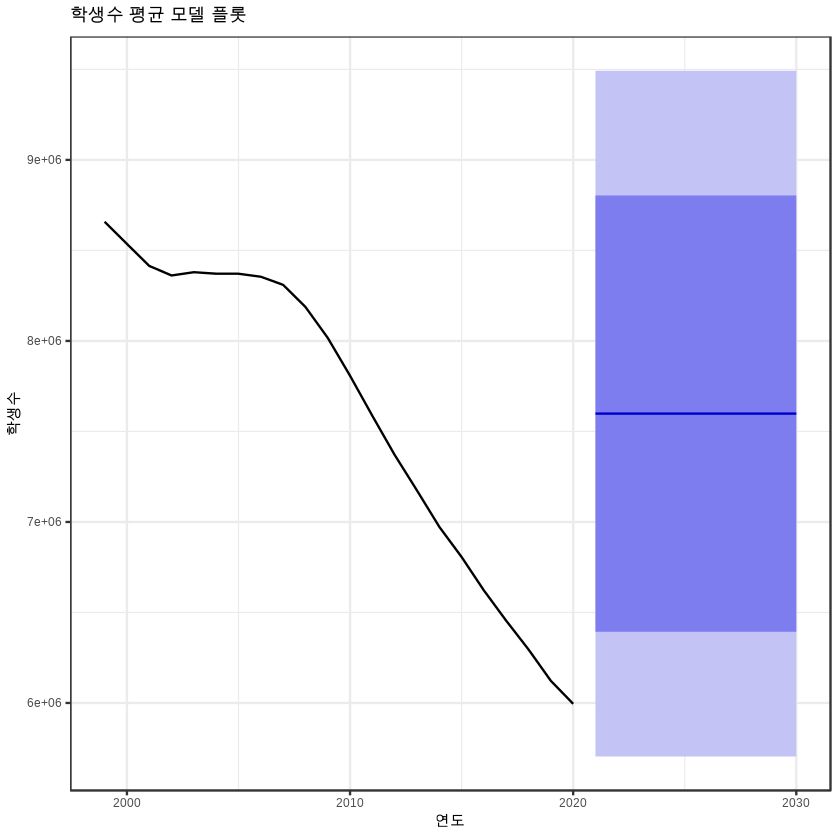

In [5]:
# autoplot()을 사용하여 ts 객체의 학생수계 열에 대한 평균 모델을 시각화
autoplot(meanf(students.ts[,2]), main = '학생수 평균 모델 플롯', xlab = '연도', ylab = '학생수')

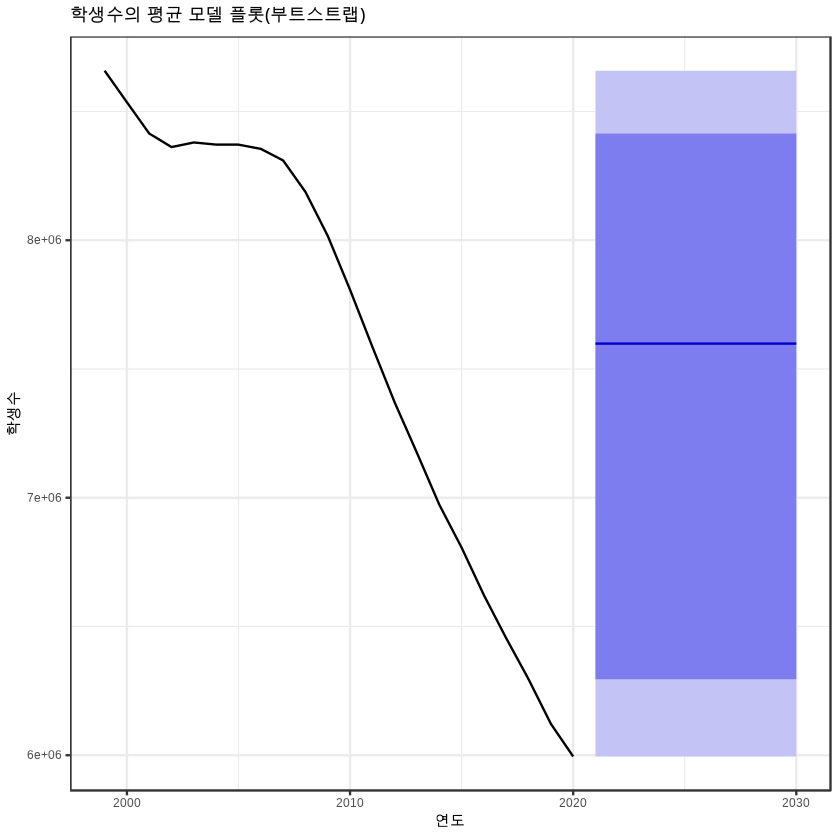

In [6]:
autoplot(meanf(students.ts[,2], bootstrap = TRUE), 
         main = '학생수의 평균 모델 플롯(부트스트랩)', xlab = '연도', ylab = '학생수')

In [7]:
employees <- read.csv('C:/Users/이찬솔/Documents/시계열/산업별_취업자_20210206234505.csv', 
                      header = TRUE, # 철 줄은 헤더 줄로 설정
                      na = '-',  # '-'로 기록된 데이터는 NA로 설정
                      strip.white = TRUE, # 빈칸은 제거
                      stringsAsFactors = TRUE)

colnames(employees) <- c('time', 'total', 'employees.edu')
employees$time <- as.Date(paste0(employees$time, '. 01'), format = '%Y. %m. %d')
employees.ts <- ts(employees, start = c(2013, 01), frequency = 12)

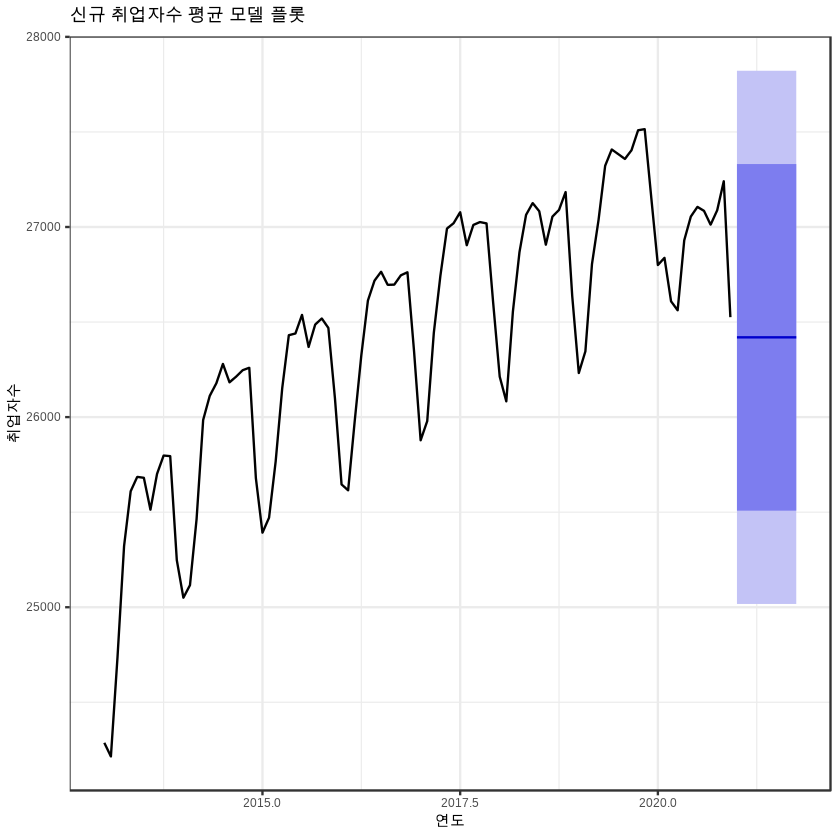

In [8]:
# 전체 취업자수에 대한 평균 모델 시각화
autoplot(meanf(employees.ts[,2]), 
         main = '신규 취업자수 평균 모델 플롯', xlab = '연도', ylab = '취업자수')

In [9]:
covid19 <- read.csv('C:/Users/이찬솔/Documents/시계열/covid19.csv', 
                    header = TRUE, 
                    na = '-', 
                    strip.white = TRUE, 
                    stringsAsFactors = TRUE)
colnames(covid19) <- c('category', 'status', 'date', 'value')
covid19 <- covid19[, c(3, 1, 2, 4)]
covid19$date <- as.Date(covid19$date, "%Y. %m. %d")

covid19 <- covid19 %>%
  filter(grepl('세', category)) %>%
  filter(category != '세종')

covid19$value <- ifelse(is.na(covid19$value), 0, covid19$value)
covid19 <- spread(covid19, category, value)
covid19.ts <- ts(covid19[, 2:10], frequency = 365)

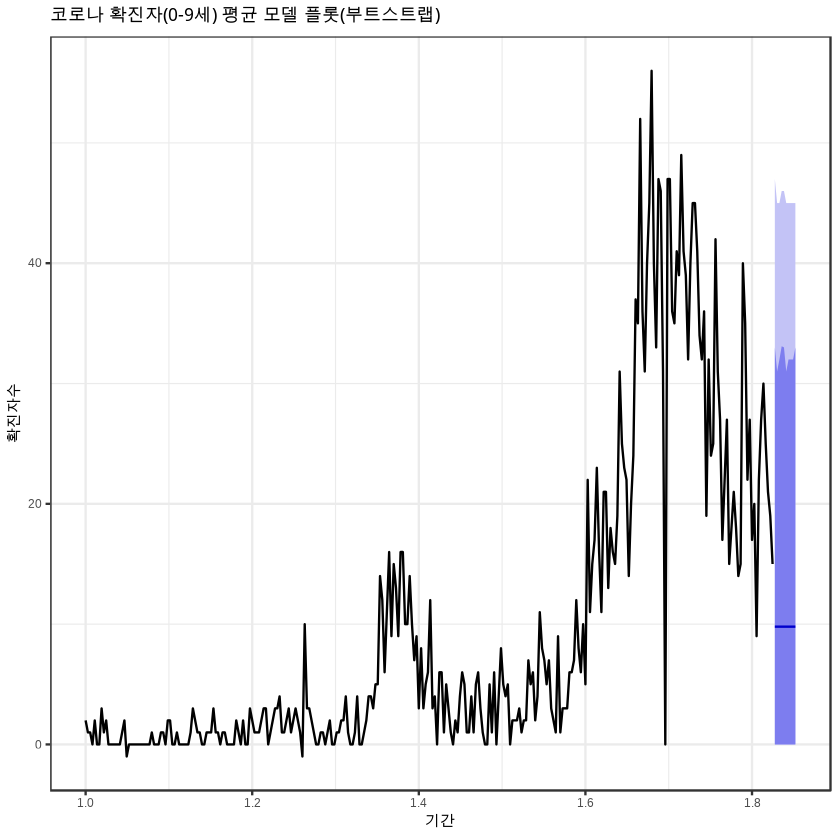

In [10]:
autoplot(meanf(covid19.ts[,2], bootstrap = TRUE), 
         main = '코로나 확진자(0-9세) 평균 모델 플롯(부트스트랩)', xlab = '기간', ylab = '확진자수')

## 단순 모델 (naive) : 마지막 값이 미래에도 지속될 것이라는 가정하에 미래 데이터를 예측 (경제 금융 시계열 모델)
- **예측 시간이 늘어날수록 범위가 증가 (아주 가까운 미래의 데이터는 지금 데이터에서 크게 벗어나지 않을 것이라는 가정, but 시간이 지날수록 불확실성 증가)**

### ```forecast::naive()``` : ts객체 데이터에 대한 10 lag의 미래 데이터 예측 
### - ```h``` : lag
- **ts객체 데이터에 대한 10 lag의 미래 데이터 예측값과, 80%, 95% 예측구간 데이터 산출**


Forecast method: Naive method

Model Information:
Call: naive(y = .) 

Residual sd: 147831.235 

Error measures:
                    ME     RMSE      MAE       MPE     MAPE MASE      ACF1
Training set -126815.2 147831.2 128514.4 -1.771615 1.791893    1 0.8922526

Forecasts:
     Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
2021        5995239 5805786 6184692 5705495 6284983
2022        5995239 5727312 6263166 5585479 6404999
2023        5995239 5667096 6323382 5493388 6497090
2024        5995239 5616332 6374146 5415751 6574727
2025        5995239 5571608 6418870 5347352 6643126
2026        5995239 5531175 6459303 5285514 6704964
2027        5995239 5493993 6496485 5228649 6761829
2028        5995239 5459384 6531094 5175720 6814758
2029        5995239 5426879 6563599 5126007 6864471
2030        5995239 5396135 6594343 5078988 6911490

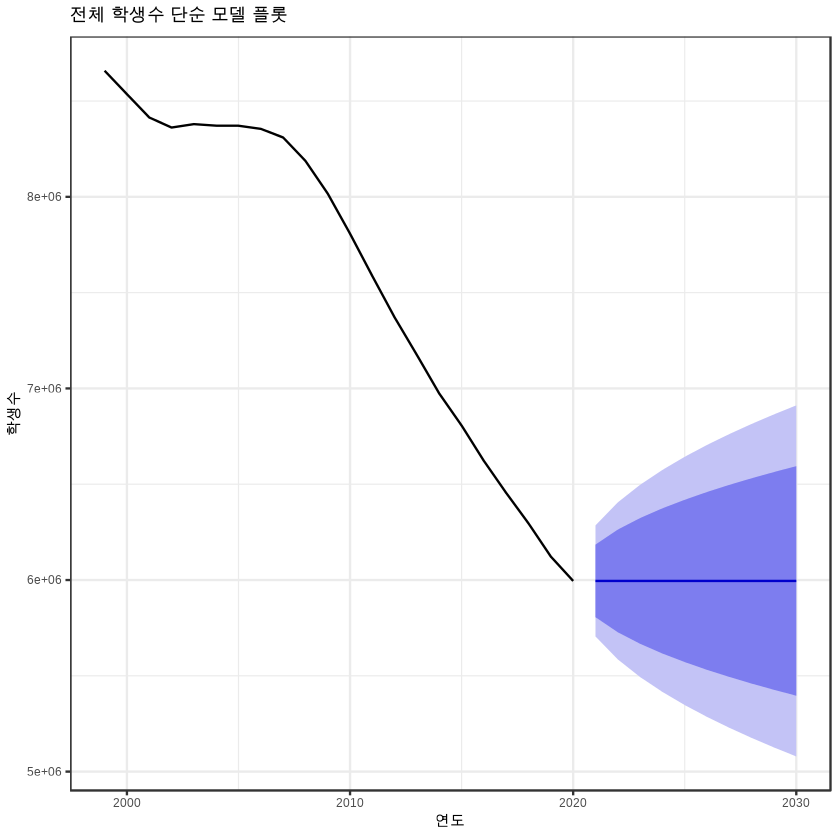

In [11]:
# 학생수계 열에 대한 단순(Naïve) 모델의 상세 정보와 플롯
students.ts[, 2] %>% naive() %>% summary()

students.ts[, 2] %>% naive() %>% 
    autoplot(main = '전체 학생수 단순 모델 플롯', xlab = '연도', ylab = '학생수')


Forecast method: Naive method

Model Information:
Call: naive(y = .) 

Residual sd: 261.4803 

Error measures:
                   ME     RMSE      MAE        MPE      MAPE      MASE
Training set 23.56842 261.4803 194.5579 0.08782727 0.7411892 0.6138395
                  ACF1
Training set 0.4208691

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2021          26526 26190.90 26861.10 26013.51 27038.49
Feb 2021          26526 26052.10 26999.90 25801.23 27250.77
Mar 2021          26526 25945.59 27106.41 25638.34 27413.66
Apr 2021          26526 25855.80 27196.20 25501.02 27550.98
May 2021          26526 25776.69 27275.31 25380.03 27671.97
Jun 2021          26526 25705.17 27346.83 25270.66 27781.34
Jul 2021          26526 25639.41 27412.59 25170.07 27881.93
Aug 2021          26526 25578.19 27473.81 25076.45 27975.55
Sep 2021          26526 25520.70 27531.30 24988.52 28063.48
Oct 2021          26526 25466.32 27585.68 24905.36 28146.64

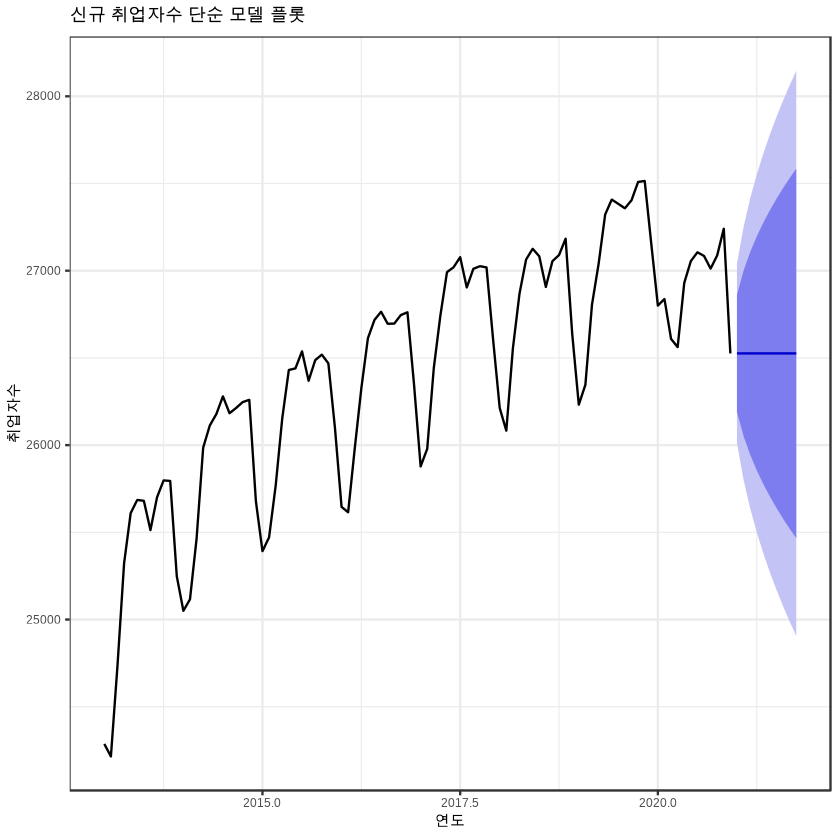

In [12]:
# 취업자수 열에 대한 단순(Naive) 모델의 상세 정보와 플롯
employees.ts[,2] %>% naive() %>% summary()

employees.ts[,2] %>% naive() %>% 
    autoplot(main = '신규 취업자수 단순 모델 플롯', xlab = '연도', ylab = '취업자수')


Forecast method: Naive method

Model Information:
Call: naive(y = .) 

Residual sd: 5.9931 

Error measures:
                     ME     RMSE      MAE MPE MAPE MASE       ACF1
Training set 0.04318937 5.993075 3.465116 NaN  Inf  NaN -0.3127329

Forecasts:
         Point Forecast      Lo 80    Hi 80      Lo 95    Hi 95
1.827397             15  7.3195658 22.68043   3.253790 26.74621
1.830137             15  4.1382258 25.86177  -1.611650 31.61165
1.832877             15  1.6970978 28.30290  -5.345033 35.34503
1.835616             15 -0.3608683 30.36087  -8.492421 38.49242
1.838356             15 -2.1739729 32.17397 -11.265325 41.26533
1.841096             15 -3.8131447 33.81314 -13.772222 43.77222
1.843836             15 -5.3205188 35.32052 -16.077552 46.07755
1.846575             15 -6.7235483 36.72355 -18.223300 48.22330
1.849315             15 -8.0413025 38.04130 -20.238631 50.23863
1.852055             15 -9.2876654 39.28767 -22.144779 52.14478

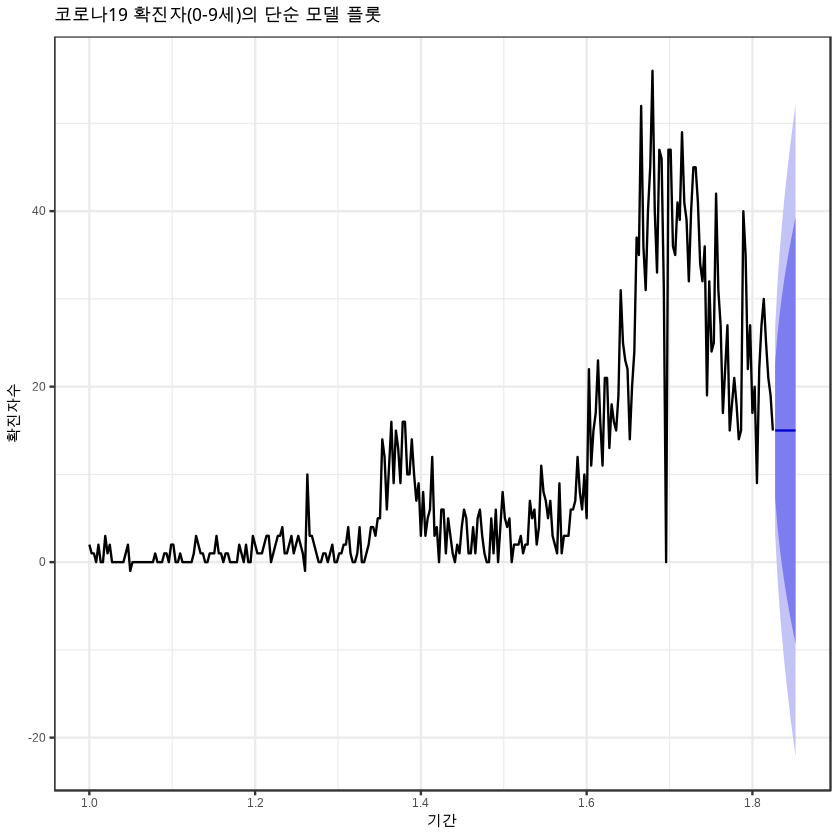

In [13]:
# 0-9세 코로나 확진자수에 대한 단순 모델의 상세 정보와 플롯
covid19.ts[,2] %>% naive() %>% summary()

covid19.ts[,2] %>% naive() %>% 
    autoplot(main = '코로나19 확진자(0-9세)의 단순 모델 플롯', xlab = '기간', ylab = '확진자수')

## 계절성 단순 모델 (seasonal naive) : 단순 모델에 계절성 추가
- 일정한 주기를 가지는 계절성에 한정

### ```forecast::snaive()``` 
### - ```h``` : lag


Forecast method: Seasonal naive method

Model Information:
Call: snaive(y = ., h = 10) 

Residual sd: 147831.235 

Error measures:
                    ME     RMSE      MAE       MPE     MAPE MASE      ACF1
Training set -126815.2 147831.2 128514.4 -1.771615 1.791893    1 0.8922526

Forecasts:
     Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
2021        5995239 5805786 6184692 5705495 6284983
2022        5995239 5727312 6263166 5585479 6404999
2023        5995239 5667096 6323382 5493388 6497090
2024        5995239 5616332 6374146 5415751 6574727
2025        5995239 5571608 6418870 5347352 6643126
2026        5995239 5531175 6459303 5285514 6704964
2027        5995239 5493993 6496485 5228649 6761829
2028        5995239 5459384 6531094 5175720 6814758
2029        5995239 5426879 6563599 5126007 6864471
2030        5995239 5396135 6594343 5078988 6911490

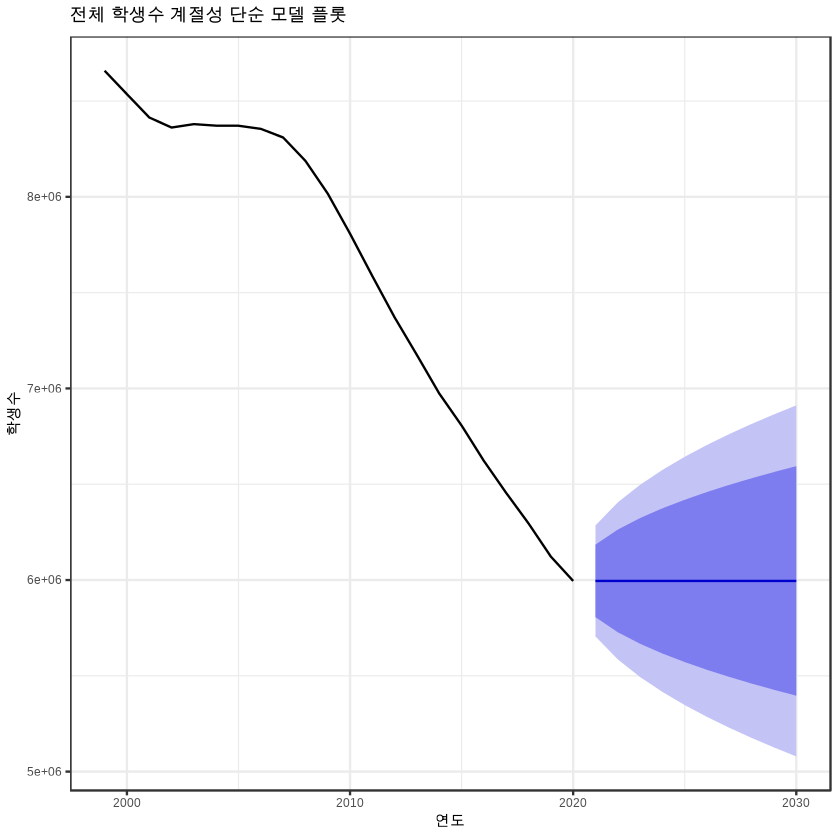

In [14]:
# 학생수계 열에 대한 계절성 단순 모델의 상세 정보와 플롯
students.ts[,2] %>% snaive(10) %>% summary()

students.ts[,2] %>% snaive(10) %>% 
    autoplot(main = '전체 학생수 계절성 단순 모델 플롯', xlab = '연도', ylab = '학생수')


Forecast method: Seasonal naive method

Model Information:
Call: snaive(y = ., h = 10) 

Residual sd: 361.904 

Error measures:
                   ME    RMSE      MAE       MPE    MAPE MASE      ACF1
Training set 229.2857 361.904 316.9524 0.8720369 1.19817    1 0.8173272

Forecasts:
         Point Forecast   Lo 80   Hi 80    Lo 95    Hi 95
Jan 2021          26800 26336.2 27263.8 26090.68 27509.32
Feb 2021          26838 26374.2 27301.8 26128.68 27547.32
Mar 2021          26609 26145.2 27072.8 25899.68 27318.32
Apr 2021          26562 26098.2 27025.8 25852.68 27271.32
May 2021          26930 26466.2 27393.8 26220.68 27639.32
Jun 2021          27055 26591.2 27518.8 26345.68 27764.32
Jul 2021          27106 26642.2 27569.8 26396.68 27815.32
Aug 2021          27085 26621.2 27548.8 26375.68 27794.32
Sep 2021          27012 26548.2 27475.8 26302.68 27721.32
Oct 2021          27088 26624.2 27551.8 26378.68 27797.32

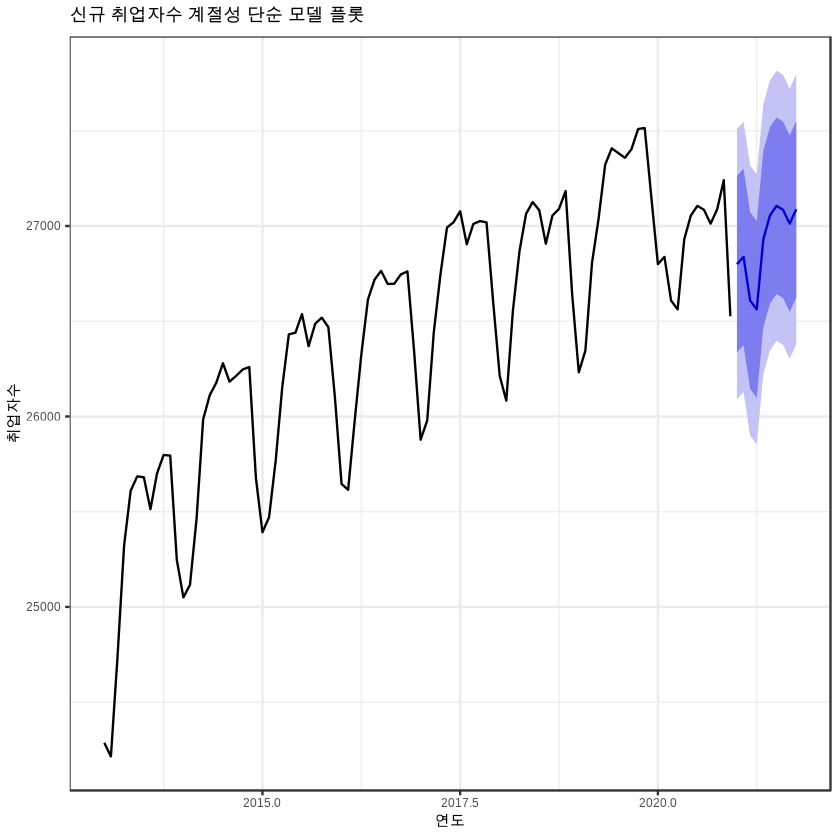

In [15]:
# 취업자수 열에 대한 계절성 단순 모델의 상세 정보와 플롯
employees.ts[,2] %>% snaive(10) %>% summary()

employees.ts[,2] %>% snaive(10) %>% 
    autoplot(main = '신규 취업자수 계절성 단순 모델 플롯', xlab = '연도', ylab = '취업자수')

## 랜덤워크 모델 (random walk) : 미래 값이 현재 값에 랜덤 값의 영향을 받아 결정된다는 모델
- 마지막 데이터에 예측이 어려운 랜덤 값의 변동이 추가
- ### 시간적으로 하나 앞선 값(lag 1)과 원본 데이터를 뺀 1차 차분들이 백색잡음이 되어야 함
- ### 랜덤워크 모델의 1차 차분을 하면 백색잡음, 백색잡음의 누적 합계는 랜덤워크

### 드리프트 : 예측값이 시간에 따라 증가하거나 감소하는 변동량
- 랜덤워크 모델에서는 예측값이 랜덤하게 발생되는 값에 의해 결정 되지만, 예측값에 영향을 미치는 표류값(drift)을 반영하는 경우의 모델링 방법

### 드리프트가 존재하는 모델은 랜덤워크 모델을 기반으로 하지만, 예측값이 시간의 흐름에 따라 상수적으로 증가하거나 감소

### ```forecast::rwf()```
### - ```drift = TRUE``` : 드리프트가 있는 랜덤워크 모델


Forecast method: Random walk

Model Information:
Call: rwf(y = .) 

Residual sd: 147831.235 

Error measures:
                    ME     RMSE      MAE       MPE     MAPE MASE      ACF1
Training set -126815.2 147831.2 128514.4 -1.771615 1.791893    1 0.8922526

Forecasts:
     Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
2021        5995239 5805786 6184692 5705495 6284983
2022        5995239 5727312 6263166 5585479 6404999
2023        5995239 5667096 6323382 5493388 6497090
2024        5995239 5616332 6374146 5415751 6574727
2025        5995239 5571608 6418870 5347352 6643126
2026        5995239 5531175 6459303 5285514 6704964
2027        5995239 5493993 6496485 5228649 6761829
2028        5995239 5459384 6531094 5175720 6814758
2029        5995239 5426879 6563599 5126007 6864471
2030        5995239 5396135 6594343 5078988 6911490

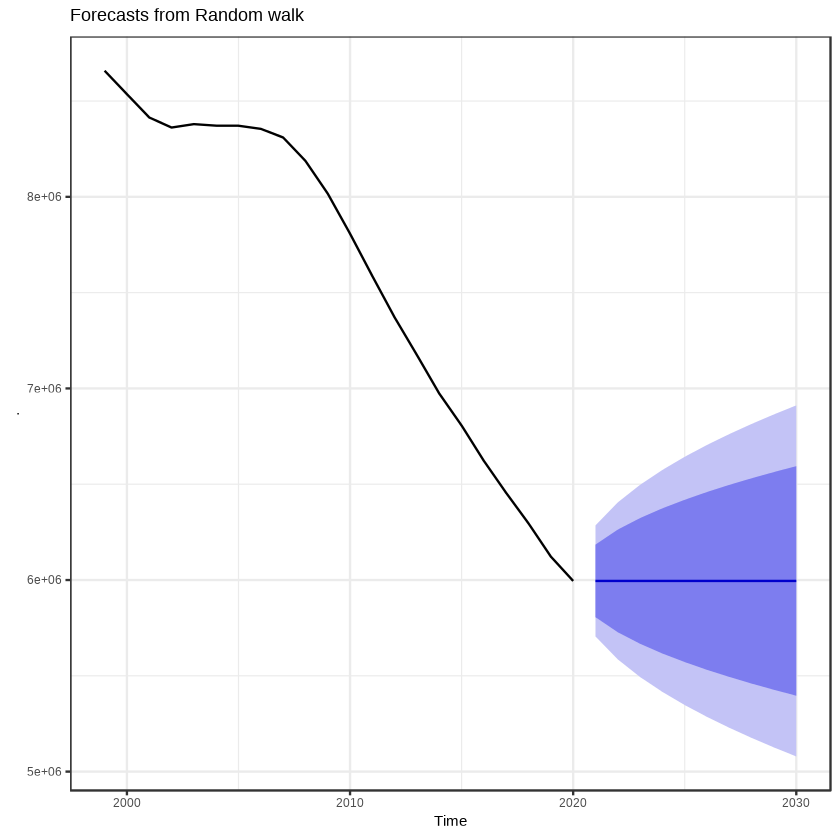

In [16]:
# 학생수계 열에 대한 랜덤워크 모델의 상세 정보와 플롯
students.ts[,2] %>% rwf() %>% summary()

students.ts[,2] %>% rwf() %>% autoplot()


Forecast method: Random walk with drift

Model Information:
Call: rwf(y = ., drift = T) 

Drift: -126815.1905  (se 16988.204)
Residual sd: 77849.7308 

Error measures:
                        ME     RMSE      MAE         MPE      MAPE      MASE
Training set -1.773887e-10 75973.56 63881.97 -0.06808499 0.8320398 0.4970802
                  ACF1
Training set 0.8922526

Forecasts:
     Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
2021        5868424 5768655 5968192 5715841 6021006
2022        5741609 5597194 5886023 5520746 5962471
2023        5614793 5433948 5795639 5338214 5891373
2024        5487978 5274664 5701292 5161743 5814214
2025        5361163 5117753 5604573 4988899 5733427
2026        5234348 4962425 5506271 4818478 5650218
2027        5107533 4808227 5406838 4649785 5565281
2028        4980717 4654875 5306560 4482385 5479050
2029        4853902 4502177 5205628 4315985 5391820
2030        4727087 4349998 5104176 4150379 5303795

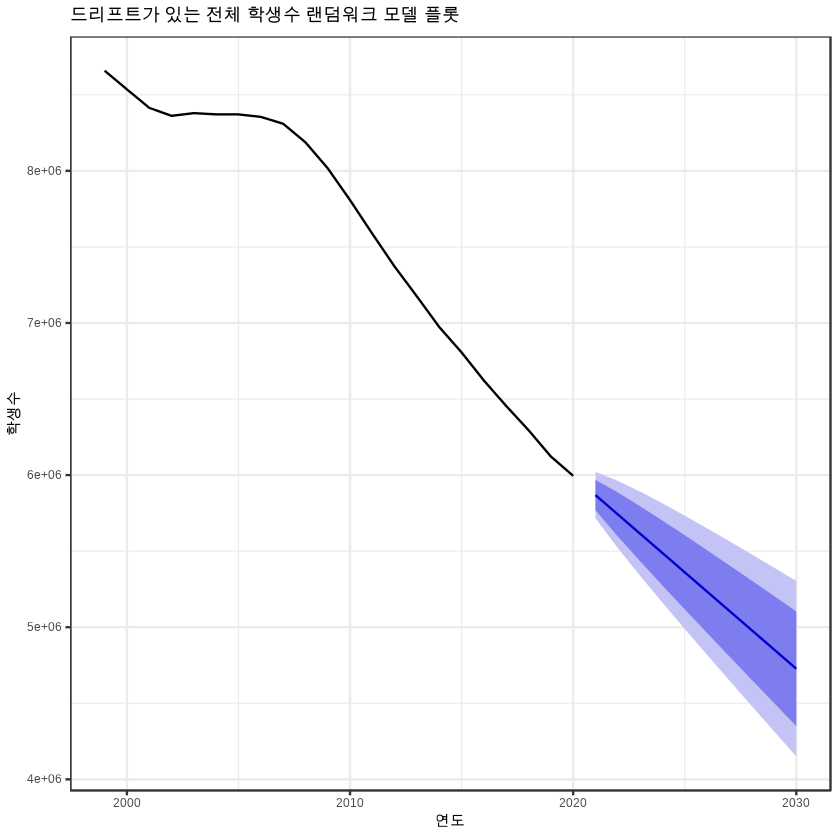

In [17]:
# 학생수계 열에 대한 드리프트가 있는 랜덤워크 모델의 상세 정보와 플롯
students.ts[,2] %>% rwf(drift = T) %>% summary()

students.ts[,2] %>% rwf(drift = T) %>% 
    autoplot(main = '드리프트가 있는 전체 학생수 랜덤워크 모델 플롯', xlab = '연도', ylab = '학생수')


Forecast method: Random walk

Model Information:
Call: rwf(y = .) 

Residual sd: 261.4803 

Error measures:
                   ME     RMSE      MAE        MPE      MAPE      MASE
Training set 23.56842 261.4803 194.5579 0.08782727 0.7411892 0.6138395
                  ACF1
Training set 0.4208691

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2021          26526 26190.90 26861.10 26013.51 27038.49
Feb 2021          26526 26052.10 26999.90 25801.23 27250.77
Mar 2021          26526 25945.59 27106.41 25638.34 27413.66
Apr 2021          26526 25855.80 27196.20 25501.02 27550.98
May 2021          26526 25776.69 27275.31 25380.03 27671.97
Jun 2021          26526 25705.17 27346.83 25270.66 27781.34
Jul 2021          26526 25639.41 27412.59 25170.07 27881.93
Aug 2021          26526 25578.19 27473.81 25076.45 27975.55
Sep 2021          26526 25520.70 27531.30 24988.52 28063.48
Oct 2021          26526 25466.32 27585.68 24905.36 28146.64

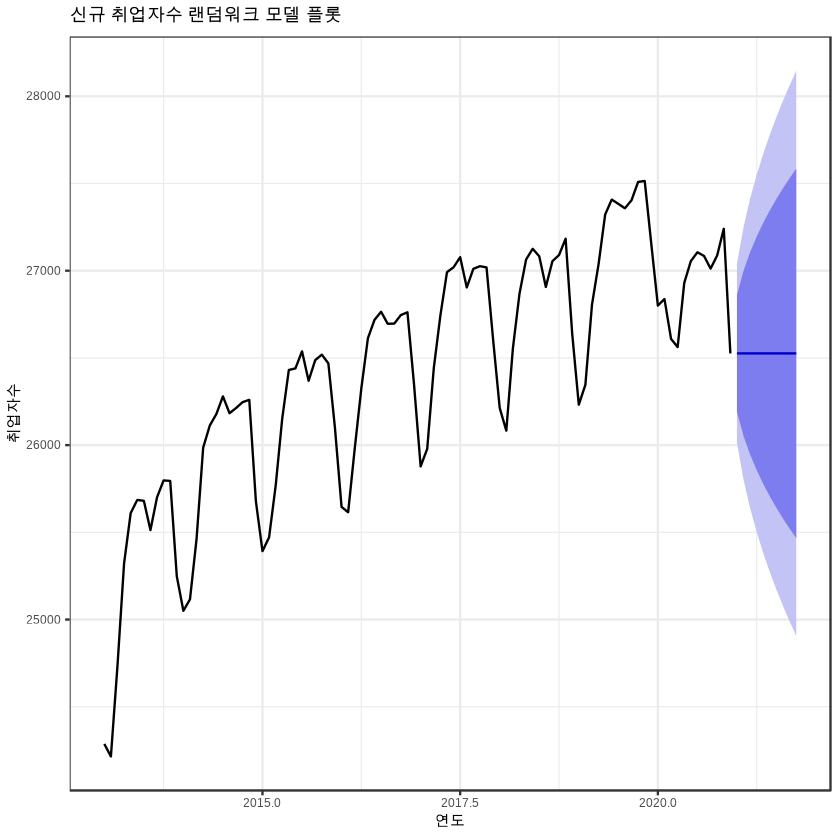

In [18]:
# 취업자수 열에 대한 랜덤워크 모델의 상세 정보와 플롯
employees.ts[,2] %>% rwf() %>% summary()

employees.ts[,2] %>% rwf() %>% 
    autoplot(main = '신규 취업자수 랜덤워크 모델 플롯', xlab = '연도', ylab = '취업자수')


Forecast method: Random walk with drift

Model Information:
Call: rwf(y = ., drift = T) 

Drift: 23.5684  (se 26.8599)
Residual sd: 261.7975 

Error measures:
                       ME    RMSE      MAE        MPE      MAPE      MASE
Training set 9.956667e-13 260.416 190.0696 -0.0013627 0.7245059 0.5996787
                  ACF1
Training set 0.4208691

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2021       26549.57 26214.06 26885.08 26036.45 27062.68
Feb 2021       26573.14 26096.17 27050.11 25843.68 27302.60
Mar 2021       26596.71 26009.50 27183.91 25698.66 27494.75
Apr 2021       26620.27 25938.75 27301.80 25577.97 27662.58
May 2021       26643.84 25877.99 27409.69 25472.58 27815.10
Jun 2021       26667.41 25824.24 27510.58 25377.89 27956.93
Jul 2021       26690.98 25775.71 27606.25 25291.19 28090.76
Aug 2021       26714.55 25731.25 27697.84 25210.72 28218.37
Sep 2021       26738.12 25690.07 27786.16 25135.27 28340.96
Oct 2021       26761.68 25651.60 2

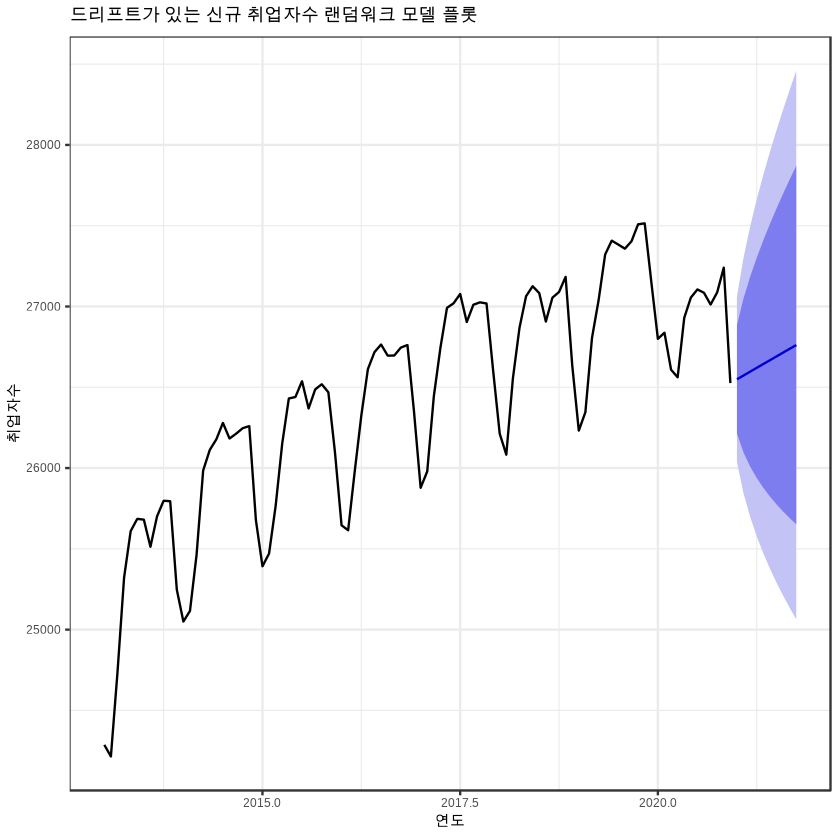

In [19]:
# 취업자수 열에 대한 드리프트가 있는 랜덤워크 모델의 상세 정보와 플롯
employees.ts[,2] %>% rwf(drift = T) %>% summary()

employees.ts[,2] %>% rwf(drift = T) %>% 
    autoplot(main = '드리프트가 있는 신규 취업자수 랜덤워크 모델 플롯', xlab = '연도', ylab = '취업자수')


Forecast method: Random walk

Model Information:
Call: rwf(y = ., h = 30) 

Residual sd: 5.9931 

Error measures:
                     ME     RMSE      MAE MPE MAPE MASE       ACF1
Training set 0.04318937 5.993075 3.465116 NaN  Inf  NaN -0.3127329

Forecasts:
         Point Forecast       Lo 80    Hi 80      Lo 95    Hi 95
1.827397             15   7.3195658 22.68043   3.253790 26.74621
1.830137             15   4.1382258 25.86177  -1.611650 31.61165
1.832877             15   1.6970978 28.30290  -5.345033 35.34503
1.835616             15  -0.3608683 30.36087  -8.492421 38.49242
1.838356             15  -2.1739729 32.17397 -11.265325 41.26533
1.841096             15  -3.8131447 33.81314 -13.772222 43.77222
1.843836             15  -5.3205188 35.32052 -16.077552 46.07755
1.846575             15  -6.7235483 36.72355 -18.223300 48.22330
1.849315             15  -8.0413025 38.04130 -20.238631 50.23863
1.852055             15  -9.2876654 39.28767 -22.144779 52.14478
1.854795             15 

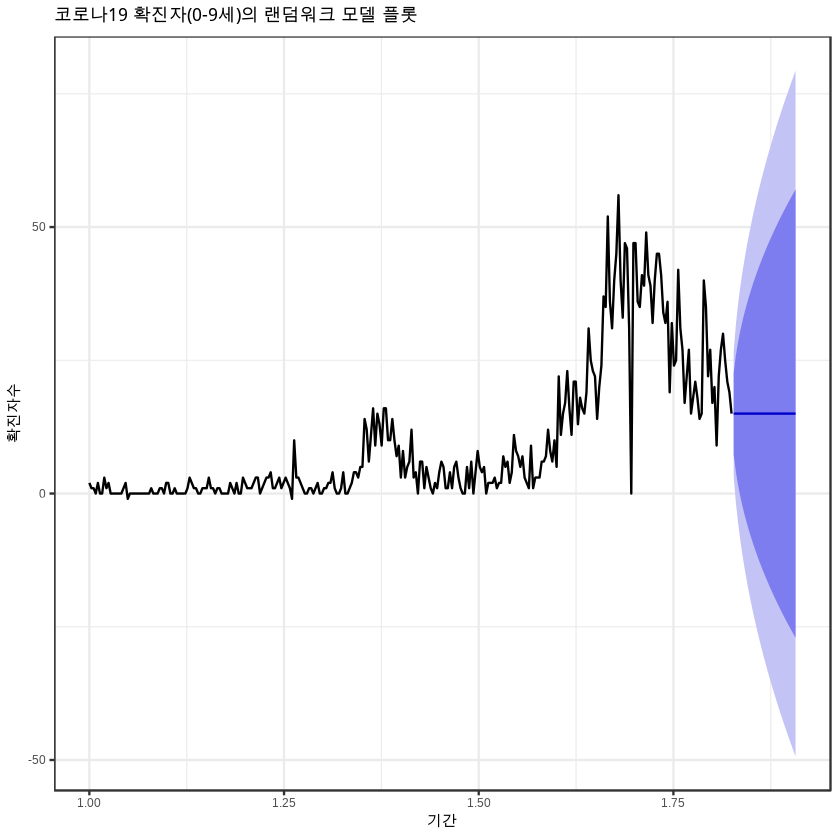

In [20]:
# 0-9세 코로나 확진자수에 대한 계절성 랜덤워크 모델의 상세 정보와 플롯
covid19.ts[,2] %>% rwf(30) %>% summary()

covid19.ts[,2] %>% rwf(30) %>% 
    autoplot(main = '코로나19 확진자(0-9세)의 랜덤워크 모델 플롯', xlab = '기간', ylab = '확진자수')


Forecast method: Random walk with drift

Model Information:
Call: rwf(y = ., h = 30, drift = T) 

Drift: 0.0432  (se 0.346)
Residual sd: 6.0029 

Error measures:
                       ME     RMSE      MAE MPE MAPE MASE       ACF1
Training set 1.142727e-16 5.992919 3.475017 NaN  Inf  NaN -0.3127329

Forecasts:
         Point Forecast      Lo 80    Hi 80      Lo 95    Hi 95
1.827397       15.04319   7.350165 22.73621   3.277724 26.80866
1.830137       15.08638   4.188742 25.98402  -1.580119 31.75288
1.832877       15.12957   1.760664 28.49847  -5.316406 35.57554
1.835616       15.17276  -0.289776 30.63529  -8.475147 38.82066
1.838356       15.21595  -2.100101 32.53200 -11.266664 41.69856
1.841096       15.25914  -3.740715 34.25899 -13.798629 44.31690
1.843836       15.30233  -5.253365 35.85802 -16.134890 46.73954
1.846575       15.34551  -6.665203 37.35623 -18.316974 49.00800
1.849315       15.38870  -7.995057 38.77247 -20.373672 51.15108
1.852055       15.43189  -9.256607 40.12039 -22

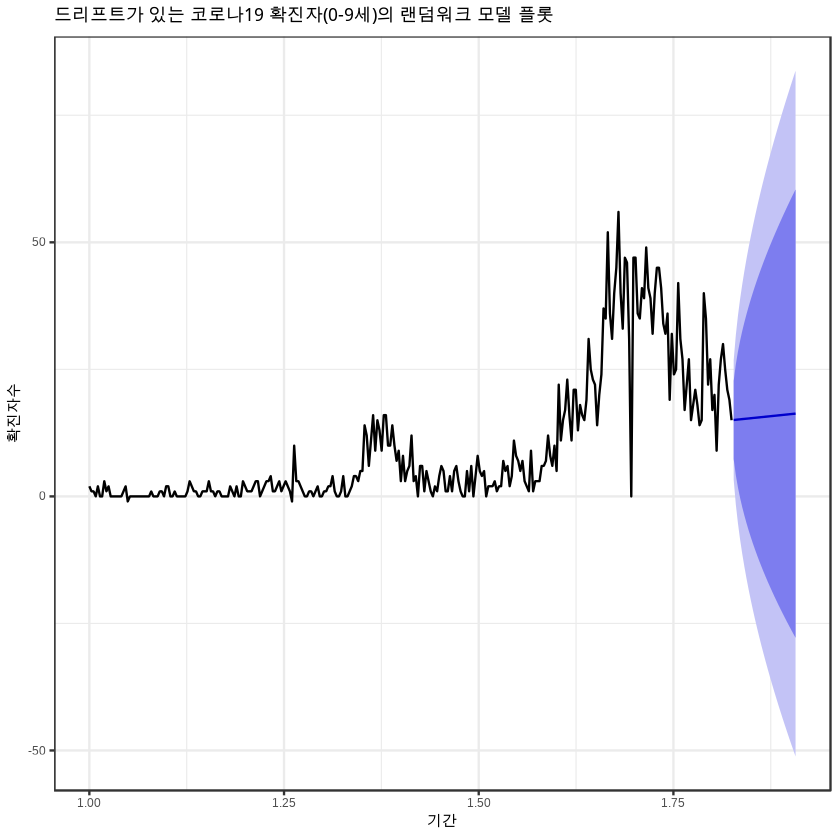

In [21]:
# 취업자수 열에 대한 드리프트가 있는 랜덤워크 모델의 상세 정보와 플롯
covid19.ts[,2] %>% rwf(30, drift = T) %>% summary()

covid19.ts[,2] %>% rwf(30, drift = T) %>% 
    autoplot(main = '드리프트가 있는 코로나19 확진자(0-9세)의 랜덤워크 모델 플롯', xlab = '기간', ylab = '확진자수')

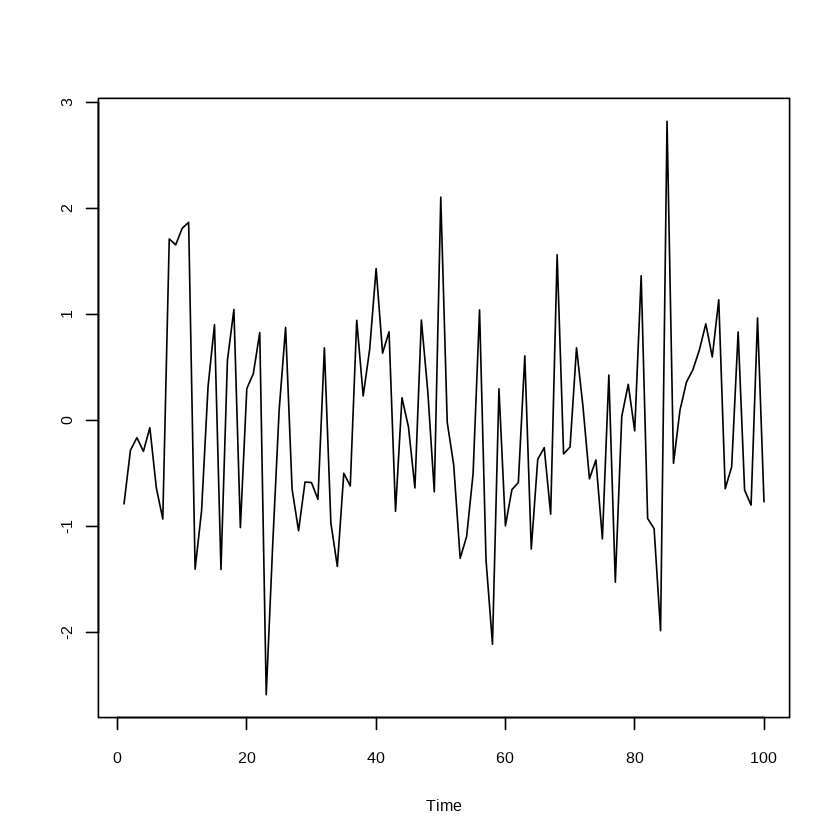

In [22]:
# 백색잡음 시뮬레이션 데이터 생성
set.seed(345)
whitenoise <- ts(rnorm(100), start = 1)
ts.plot(whitenoise, ylab = '')

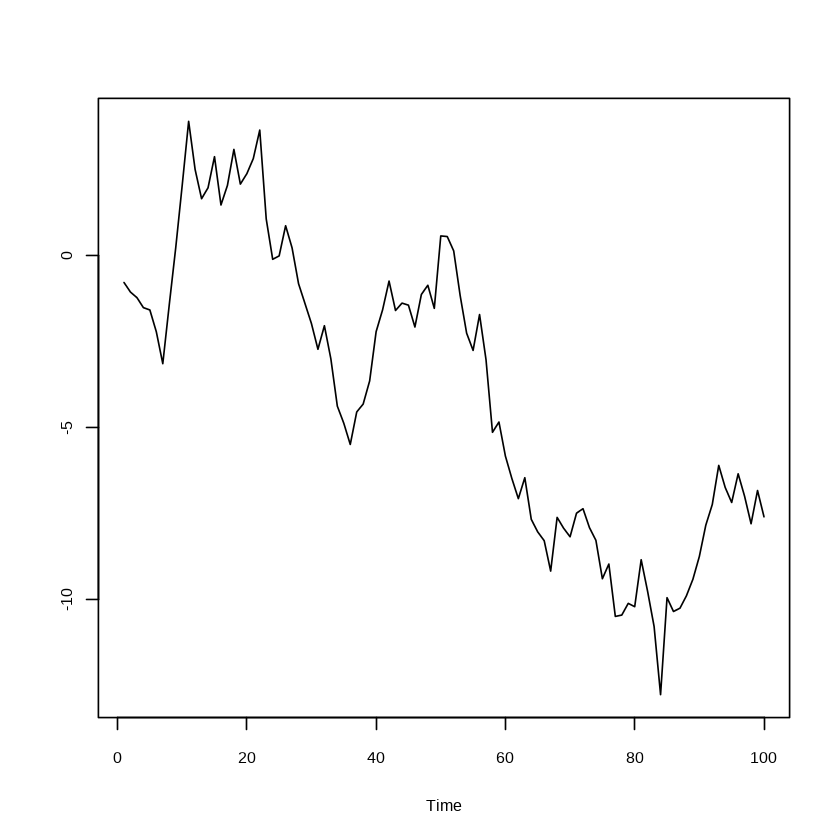

In [23]:
# 백색잡음 데이터로 랜덤워크 생성
whitenoise.to.randomwalk <- cumsum(whitenoise)
ts.plot(whitenoise.to.randomwalk, ylab = '')

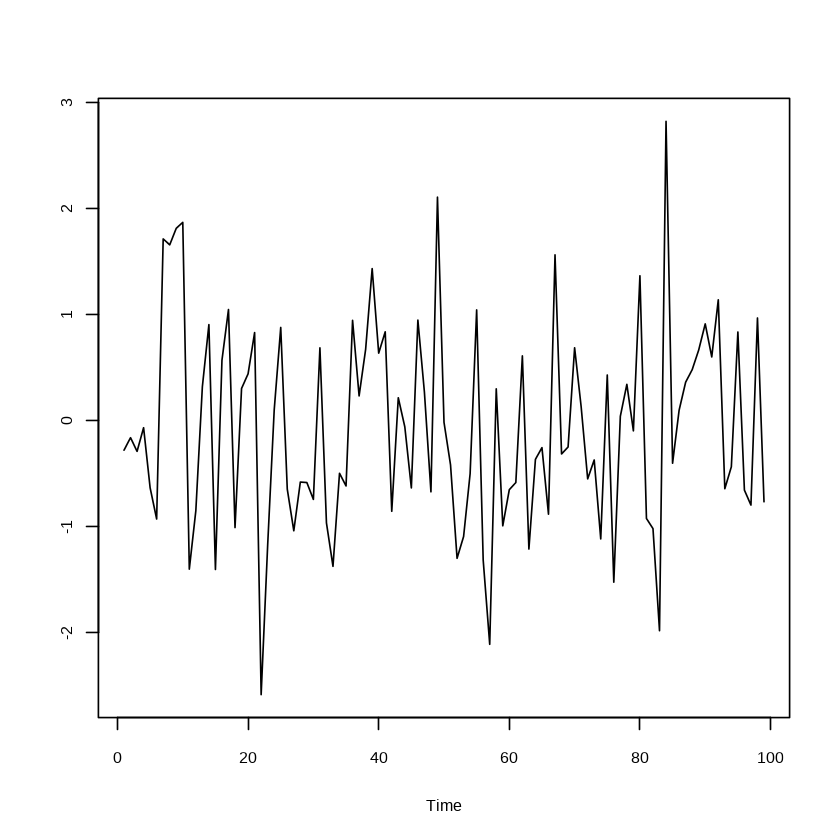

In [24]:
# 랜덤워크에서 백색잡음 생성
randomwalk.to.whitenoise <- diff(whitenoise.to.randomwalk)
ts.plot(randomwalk.to.whitenoise, ylab = '')

#### 평균, 단순, 계절성 단순, 랜덤워크 모델들을 하나의 플롯으로

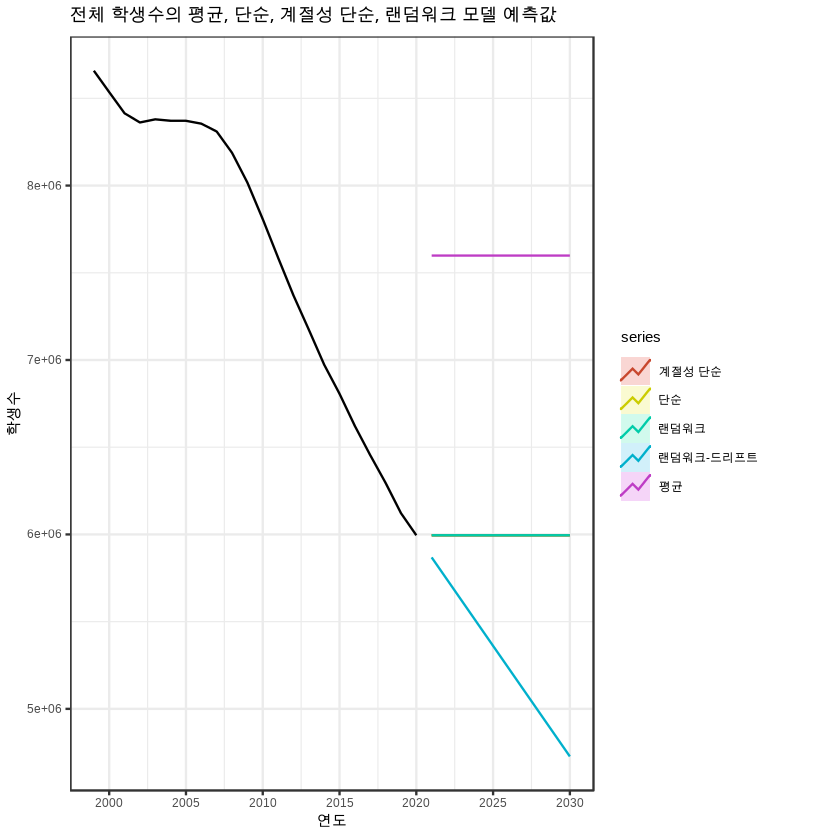

In [25]:
# 학생수계의 평균, 단순, 계절성 단순, 랜덤워크 모델의 예측값 플롯
autoplot(students.ts[,2]) +
  autolayer(meanf(students.ts[,2], h = 10), PI = FALSE, series = '평균') +
  autolayer(naive(students.ts[,2], h = 10), PI = FALSE, series = '단순') +
  autolayer(snaive(students.ts[,2], h = 10), PI = FALSE, series = '계절성 단순') +
  autolayer(rwf(students.ts[,2], h = 10), PI = FALSE, series = '랜덤워크') +
  autolayer(rwf(students.ts[,2], h = 10, drift = TRUE), PI = FALSE, series = '랜덤워크-드리프트') +
  labs(title = '전체 학생수의 평균, 단순, 계절성 단순, 랜덤워크 모델 예측값', 
       x = '연도', y = '학생수')

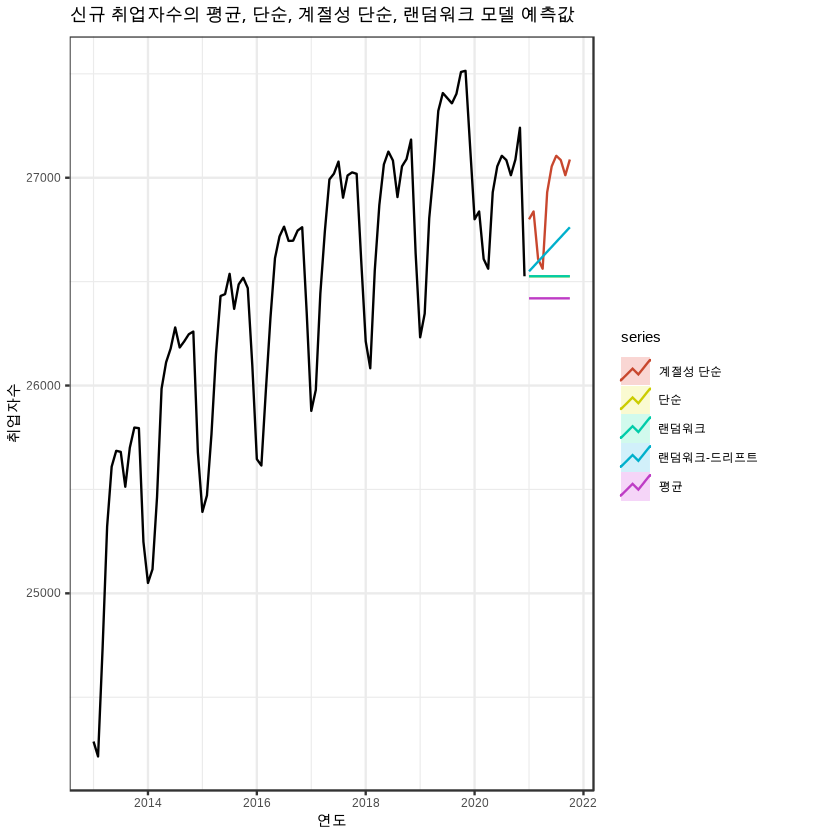

In [26]:
# 취업자수의 평균, 단순, 계절성 단순, 랜덤워크 모델의 예측값 플롯
autoplot(employees.ts[,2]) +
  autolayer(meanf(employees.ts[,2], h = 10), PI = FALSE, series = '평균') +
  autolayer(naive(employees.ts[,2], h = 10), PI = FALSE, series = '단순') +
  autolayer(snaive(employees.ts[,2], h = 10), PI = FALSE, series = '계절성 단순') +
  autolayer(rwf(employees.ts[,2], h = 10), PI = FALSE, series = '랜덤워크') +
  autolayer(rwf(employees.ts[,2], h = 10, drift = TRUE), PI = FALSE, series = '랜덤워크-드리프트') +
  labs(title = '신규 취업자수의 평균, 단순, 계절성 단순, 랜덤워크 모델 예측값',
       x = '연도', y = '취업자수')

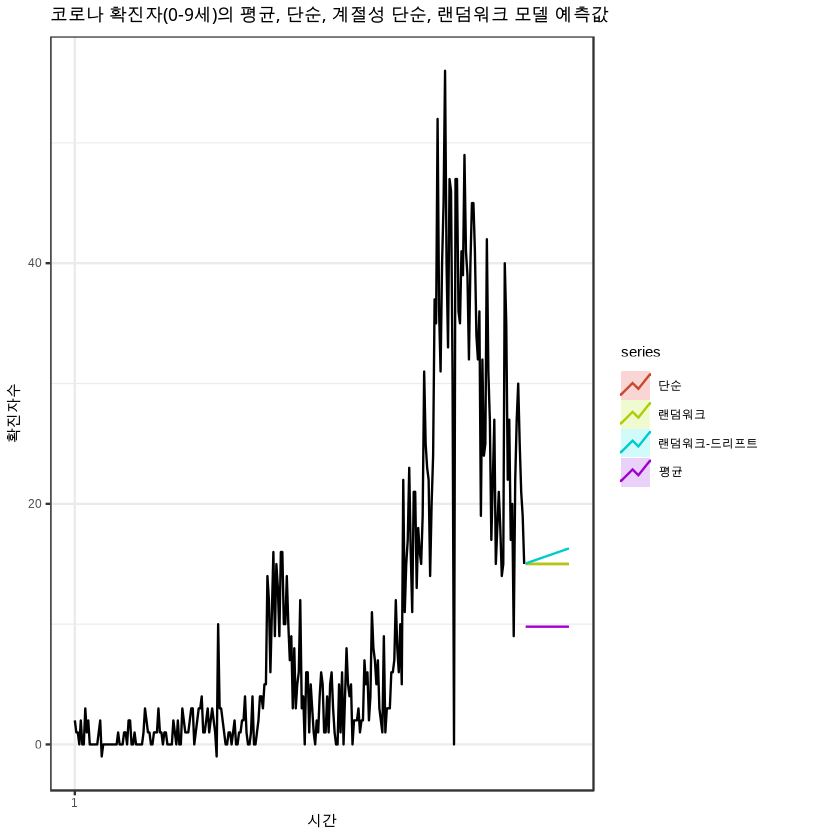

In [27]:
# 0-9세 코로나 확진자의 평균, 단순, 계절성 단순, 랜덤워크 모델의 예측값 플롯
autoplot(covid19.ts[,2]) +
  autolayer(meanf(covid19.ts[,2], h = 30), PI = FALSE, series = '평균') +
  autolayer(naive(covid19.ts[,2], h = 30), PI = FALSE, series = '단순') +
  autolayer(rwf(covid19.ts[,2], h = 30), PI = FALSE, series = '랜덤워크') +
  autolayer(rwf(covid19.ts[,2], h = 30, drift = TRUE), PI = FALSE, series = '랜덤워크-드리프트') +
  labs(title = '코로나 확진자(0-9세)의 평균, 단순, 계절성 단순, 랜덤워크 모델 예측값', 
       x = '시간', y = '확진자수')

## 회귀 모델
1. 두 가지 이상의 시계열 데이터 간의 상관관계를 회귀 모델로 추상화
2. 한가지 시계열 데이터의 시간에 따른 회귀 모델 (추세, 계절성, 반복성을 회귀에 반영)


- 회귀모델의 잔차가 백색잡음이어야 한다. 만약 잔차가 백색잡음이 아니라면, 시계열적 특성을 더 모델링해서 제거 해야함


### ```forecast::tslm()```
- ```~ trend``` : 추세를 반영하여 모델 생성
- ```~ season``` : 계절성을 반영하여 생성
- ```~ trend + season```


Call:
tslm(formula = students.ts[, 2] ~ trend, data = students.ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-327962 -206697  -48003  183951  390933 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9118484     107928   84.49  < 2e-16 ***
trend        -132164       8218  -16.08 6.61e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 244500 on 20 degrees of freedom
Multiple R-squared:  0.9282,	Adjusted R-squared:  0.9246 
F-statistic: 258.7 on 1 and 20 DF,  p-value: 6.608e-13


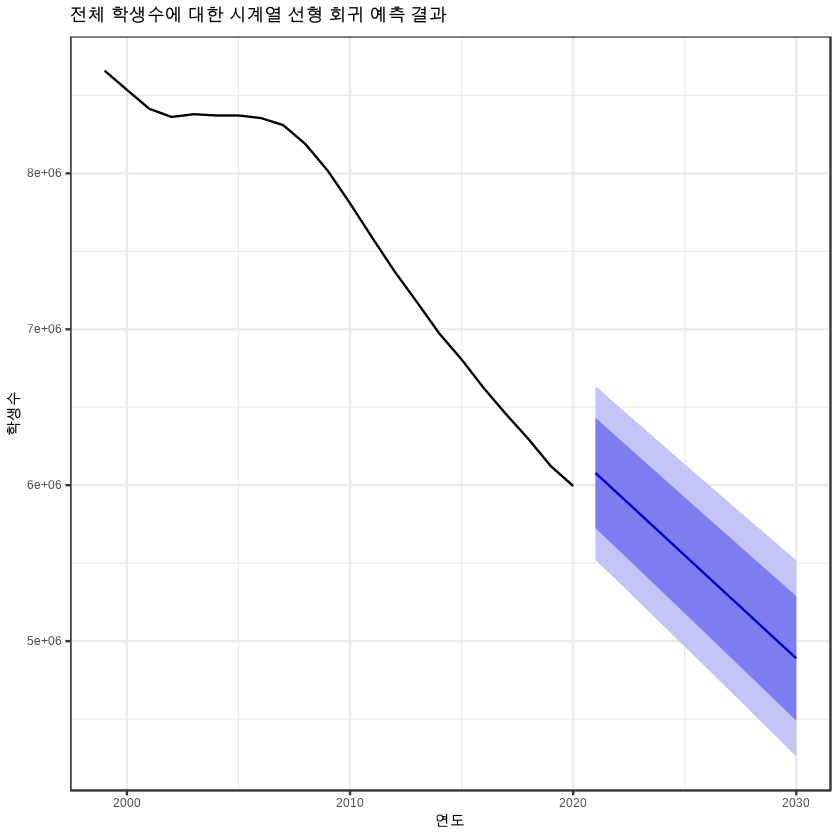

In [32]:
# 전체 학생수 예측 모델을 추세를 반영하여 생성
student.ts.lm <- tslm(students.ts[,2] ~ trend, data = students.ts)

summary(student.ts.lm)

# 전체 학생수 예측 모델을 forecast()를 사용해 예측값을 산출하고 autoplot()으로 플롯 생성
student.ts.lm %>% forecast() %>% 
    autoplot() + 
    labs(title = '전체 학생수에 대한 시계열 선형 회귀 예측 결과', x = '연도', y = '학생수')

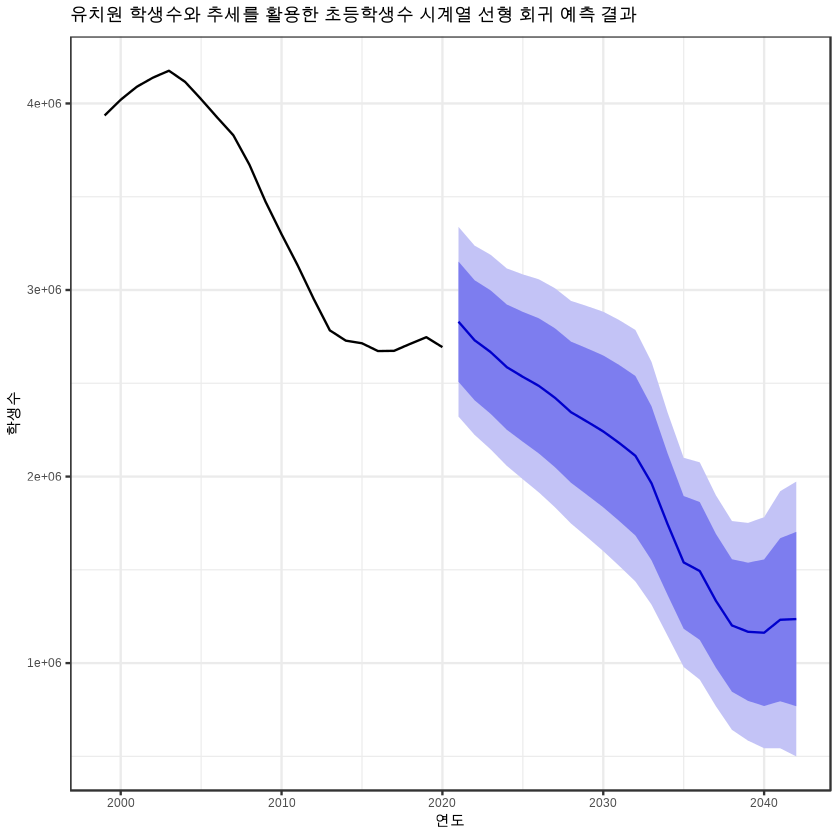

In [33]:
# 초등학생 학생수의 예측 모델을 생성하는 데 유치원 학생수와 trend를 사용하는 선형 모델을 생성
student.ts.lm <- tslm(students.ts[,4] ~ students.ts[,3] + trend, data = students.ts)

# forecast()로 생성된 모델에 대한 미래 예측 데이터를 만들고 autoplot()으로 플롯 생성
student.ts.lm %>% forecast(h = 22) %>% 
    autoplot(main = '유치원 학생수와 추세를 활용한 초등학생수 시계열 선형 회귀 예측 결과', 
             xlab = '연도', ylab = '학생수')

In [35]:
## 에러나는게 정상입니다 (연도별 데이터는 계절성이 존재하지 않음)
student.ts.lm <- tslm(students.ts[,2] ~ trend + season, data = students.ts)

ERROR: Error in tslm(students.ts[, 2] ~ trend + season, data = students.ts): Non-seasonal data cannot be modelled using a seasonal factor



Call:
tslm(formula = employees.ts[, 2] ~ trend, data = employees.ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-1256.4  -264.1   119.9   350.6   525.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25430.605     85.545  297.28   <2e-16 ***
trend          20.394      1.531   13.32   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 415.8 on 94 degrees of freedom
Multiple R-squared:  0.6536,	Adjusted R-squared:  0.6499 
F-statistic: 177.3 on 1 and 94 DF,  p-value: < 2.2e-16


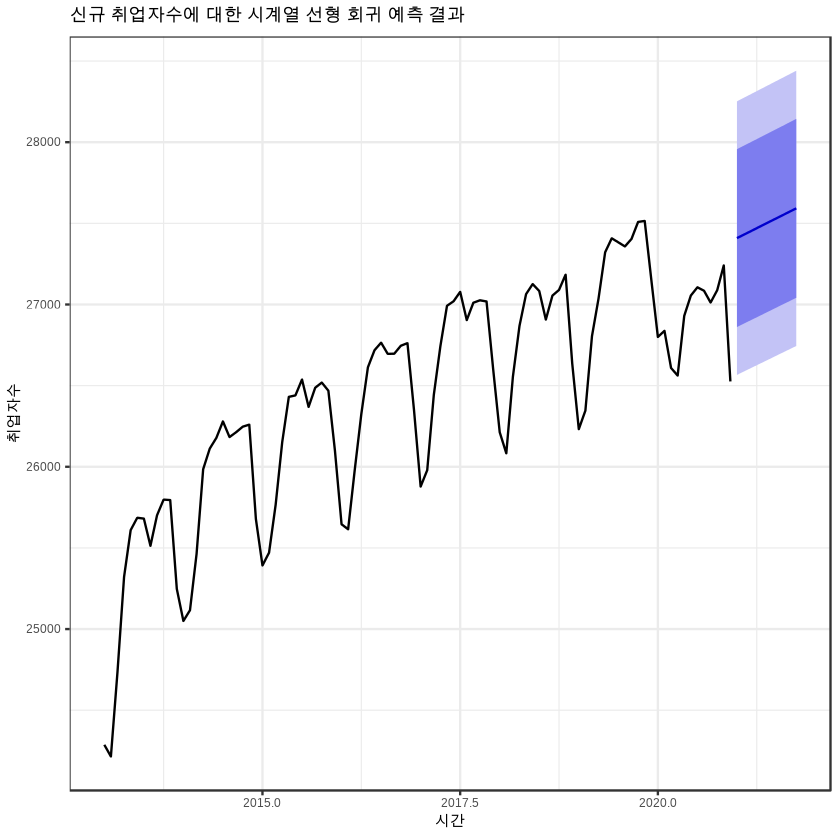

In [34]:
# 전체 취업자수를 추세(trend)만으로 선형 회귀 분석
employee.total.ts.lm <- tslm(employees.ts[,2] ~ trend, data = employees.ts)

# y절편이 25430, 기울기가 20.39인 선형 회귀 모델 생성
summary(employee.total.ts.lm)

# 전체 취업자수에 대한 선형 회귀 모델의 예측값에 대한 플롯 생성
employee.total.ts.lm %>% forecast() %>% 
    autoplot() + 
    labs(title = '신규 취업자수에 대한 시계열 선형 회귀 예측 결과', x = '시간', y = '취업자수')


Call:
tslm(formula = employees.ts[, 2] ~ trend + season, data = employees.ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-675.70  -42.60   76.66  147.08  312.95 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24850.616     96.043 258.744  < 2e-16 ***
trend          19.457      0.919  21.171  < 2e-16 ***
season2         1.168    123.798   0.009  0.99249    
season3       318.462    123.808   2.572  0.01189 *  
season4       629.005    123.825   5.080 2.29e-06 ***
season5       869.174    123.849   7.018 5.63e-10 ***
season6       919.342    123.880   7.421 9.13e-11 ***
season7       935.260    123.918   7.547 5.14e-11 ***
season8       803.429    123.962   6.481 6.13e-09 ***
season9       854.597    124.013   6.891 9.94e-10 ***
season10      890.516    124.071   7.177 2.75e-10 ***
season11      898.809    124.135   7.241 2.07e-10 ***
season12      385.477    124.207   3.104  0.00261 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.'

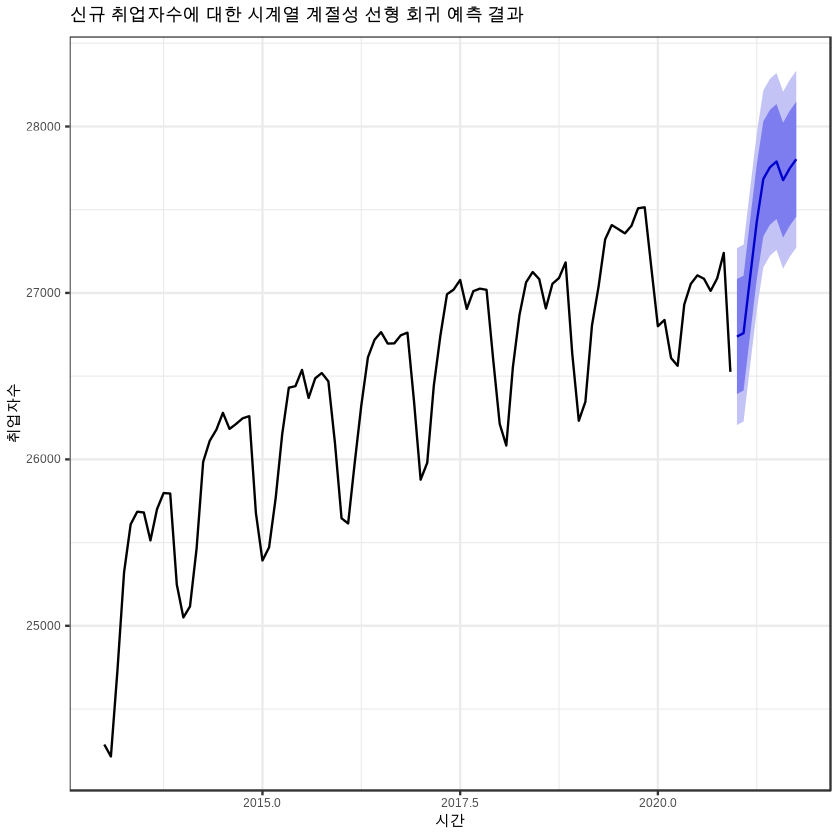

In [36]:
# 전체 취업자수를 추세(trend)와 계절성(season)으로 선형 회귀 분석
employee.total.ts.lm <- tslm(employees.ts[,2] ~ trend + season, data = employees.ts)

summary(employee.total.ts.lm)

employee.total.ts.lm %>% forecast() %>% 
    autoplot() + 
    labs(title = '신규 취업자수에 대한 시계열 계절성 선형 회귀 예측 결과', x = '시간', y = '취업자수')

### ```forecast::checkresiduals()```






#### Breusch-Godfrey 검정 : 회귀 분석을 시행한 모델의 잔차의 백색잡음 검정


	Breusch-Godfrey test for serial correlation of order up to 5

data:  Residuals from Linear regression model
LM test = 19.584, df = 5, p-value = 0.001496


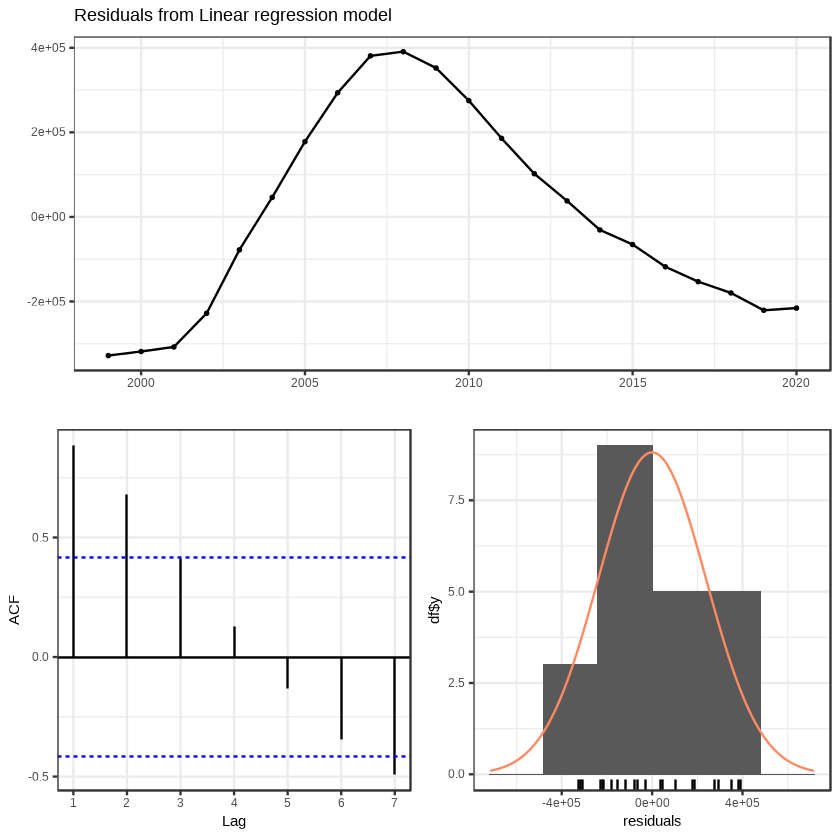

In [37]:
checkresiduals(tslm(students.ts[,2] ~ trend, data = students.ts))

### ```timetk::plot_time_series_regression``` : 시계열 데이터를 처리하고 시각화
- ```.data``` : 데이터 프레임
- ```.date_var``` : 시간 열
- ```.formula``` : 데이터 프레임의 시간 열을 직접 지엉 (trend, season 사용 불가)
- ```.interactive``` : (FALSE / TRUE)
- ```.show_summary``` : (FALSE / TRUE)

In [38]:
library(timetk)
library(lubridate)


Call:
stats::lm(formula = .formula, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-328001 -206778  -47994  183960  390806 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12819016.6   328759.6   38.99  < 2e-16 ***
연도            -361.8       22.5  -16.08 6.61e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 244500 on 20 degrees of freedom
Multiple R-squared:  0.9282,	Adjusted R-squared:  0.9246 
F-statistic: 258.7 on 1 and 20 DF,  p-value: 6.612e-13



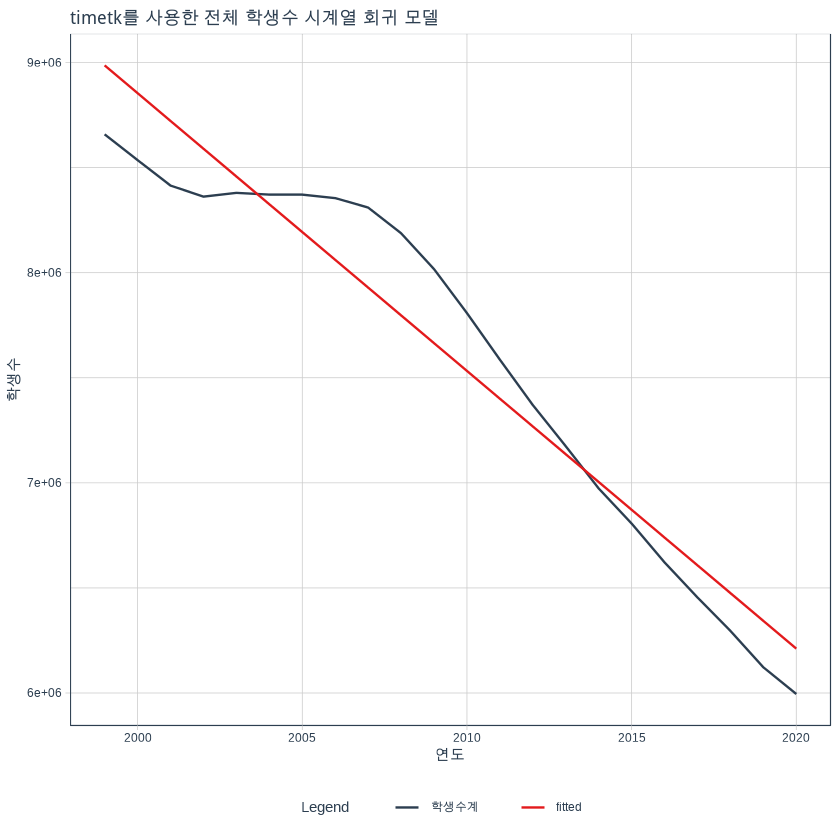

In [39]:
plot_time_series_regression(.data = students,
                            .date_var = 연도,
                            .formula = 학생수계 ~ 연도,
                            .interactive = FALSE,
                            .show_summary = TRUE) +
  labs(title = 'timetk를 사용한 전체 학생수 시계열 회귀 모델', x = '연도', y = '학생수')

In [70]:
library(tsibble)
library(zoo)

In [71]:
employees <- read.csv('C:/Users/이찬솔/Documents/시계열/산업별_취업자_20210206234505.csv', 
                      header = TRUE, # 철 줄은 헤더 줄로 설정
                      na = '-',  # '-'로 기록된 데이터는 NA로 설정
                      strip.white = TRUE, # 빈칸은 제거
                      stringsAsFactors = TRUE)

colnames(employees) <- c('time', 'total', 'employees.edu')
employees$time <- as.Date(paste0(employees$time, '. 01'), format = '%Y. %m. %d')

In [72]:
# 계절성 반영을 위해
employees$date <- as.yearmon(employees$time, "%Y. %m")

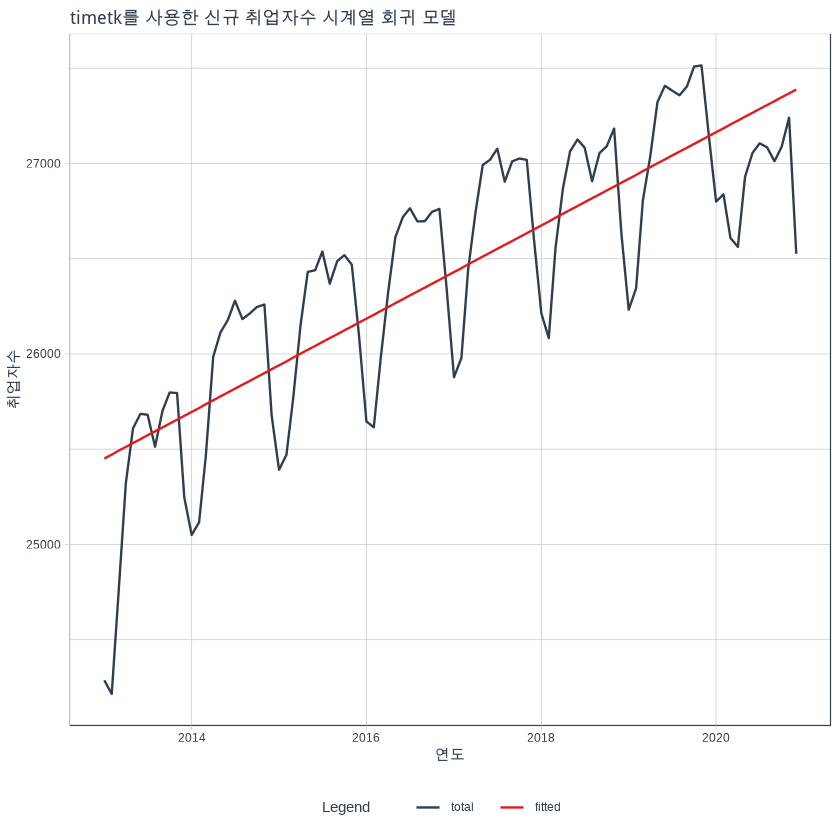

In [73]:
# plot_time_series_regression에 trend만 반영 시
plot_time_series_regression(.data = employees,
                            .date_var = time,
                            .formula = total ~ as.numeric(yearmonth(date)),
                            .interactive = FALSE) +
  labs(title = 'timetk를 사용한 신규 취업자수 시계열 회귀 모델', x = '연도', y = '취업자수')

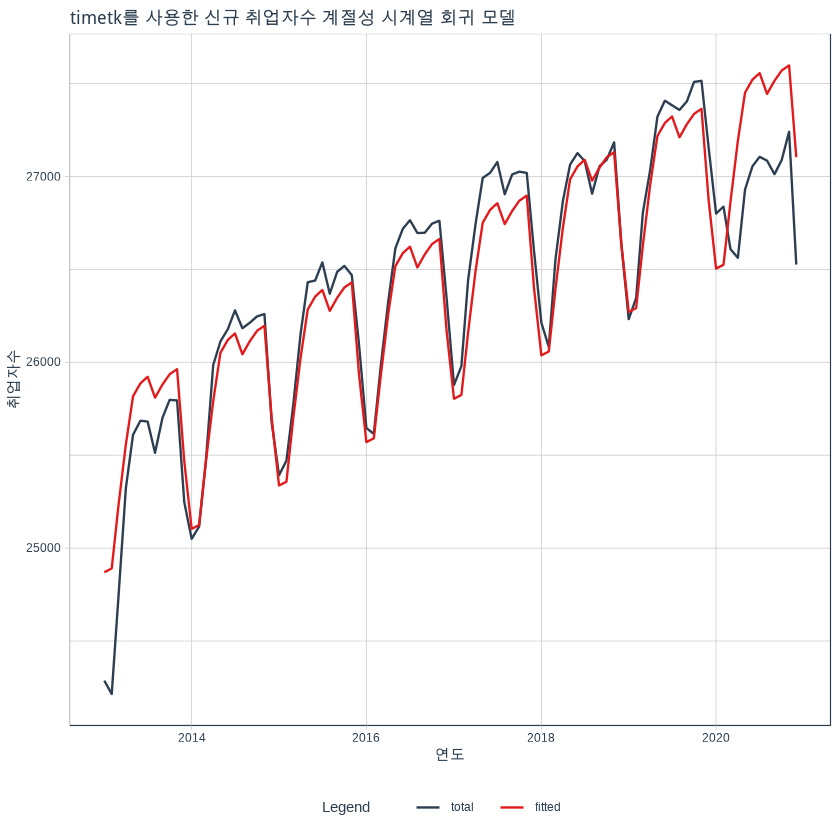

In [74]:
# plot_time_series_regression에 trend, season(월)까지 반영
plot_time_series_regression(.data = employees,
                            .date_var = time,
                            .formula = total ~ year(date) +
                              month(date, label = TRUE),
                            .interactive = FALSE) +
  labs(title = 'timetk를 사용한 신규 취업자수 계절성 시계열 회귀 모델', x = '연도', y = '취업자수')

## 지수 평활 모델 (exponential smoothing model) : 현재와 가까운 과거일수록 더 많은 가중치를 주는 방식으로 모델링

- **최근 데이터에 가중치를 높게 주기 대문에 추세, 계절성, 순환성이 심하지 않은 단기 데이터의 모델링에 적합**


## 단순 지수 평활 모델 : 추세, 계절성 등 시계열적 특성이 비교적 약한 데이터에 적합
- 한 단계씩 예측해 나가는 방법
- **초기 레벨 값인 l 값 부터 시작하여 한 단계 앞 값을 예측, 이를 반복**

### 평활 계수 : 가까운 과거에 할당하는 가중치 (0 ~ 1)
- 홀트 모델이나 홀트 윈터 모델에는 추세를 나타내는 계수와 계절성을 나타내는 계수가 추가
| 연도 | 가중치 (alpha) |
| -- | -- |
| 2020 | 0.8 |
| 2019 | 0.16 = 0.8 * (1 - 0.8) |
| 2018 | 0.032 = 0.8 * (1 - 0.8) * (1 - 0.8) |


### ```forecast::ses()```
- ```alpha``` : 평활 계수
- ```beta```, ```gamma``` 추가시 홀트 모델, 홀트 윈터 모델

In [51]:
ses(students.ts[,2]) %>% summary()


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = students.ts[, 2]) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 8394600.8229 

  sigma:  162570.5

     AIC     AICc      BIC 
599.8562 601.1896 603.1294 

Error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE      ACF1
Training set -109072.2 155004.8 134671.7 -1.552769 1.849053 1.047911 0.4105529

Forecasts:
     Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
2021        5995252 5786909 6203594 5676619 6313884
2022        5995252 5700626 6289878 5544660 6445843
2023        5995252 5634416 6356087 5443401 6547102
2024        5995252 5578598 6411905 5358035 6632468
2025        5995252 5529421 6461082 5282825 6707678
2026        5995252 5484962 6505542 5214830 6775673
2027        5995252 5444077 6546427 5152302 6838201
2028        5995252 5406022 6584481 5094103 6896401
2029        5995252 5370280 6620223 5039440 695106

* **alpha = 0.9999 => 거의 1과 가깝기 때문에, 바로 이전 데이터에 거의 모든 가중치를 다 준 것 => 단순 모델과 거의 같은 모델**



* **l = 8394600.8229 : 지수 평활의 시작점 위치**

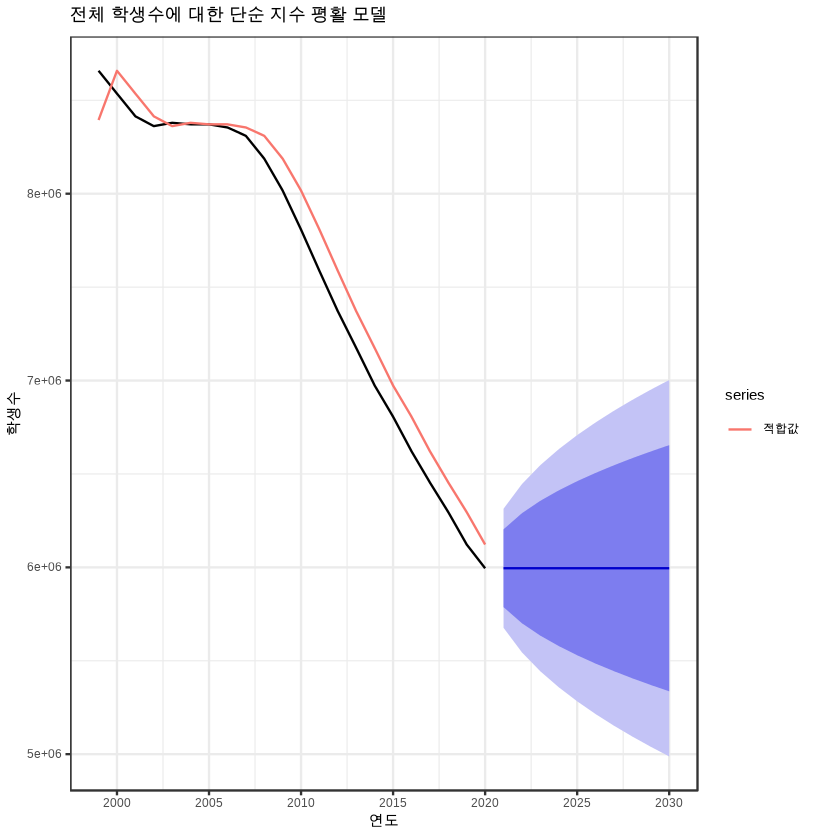

In [52]:
autoplot(students.ts[,2]) +
  autolayer(fitted(ses(students.ts[,2])), series = '적합값') +
  autolayer(ses(students.ts[,2])) +
  labs(title = '전체 학생수에 대한 단순 지수 평활 모델', x = '연도', y = '학생수')

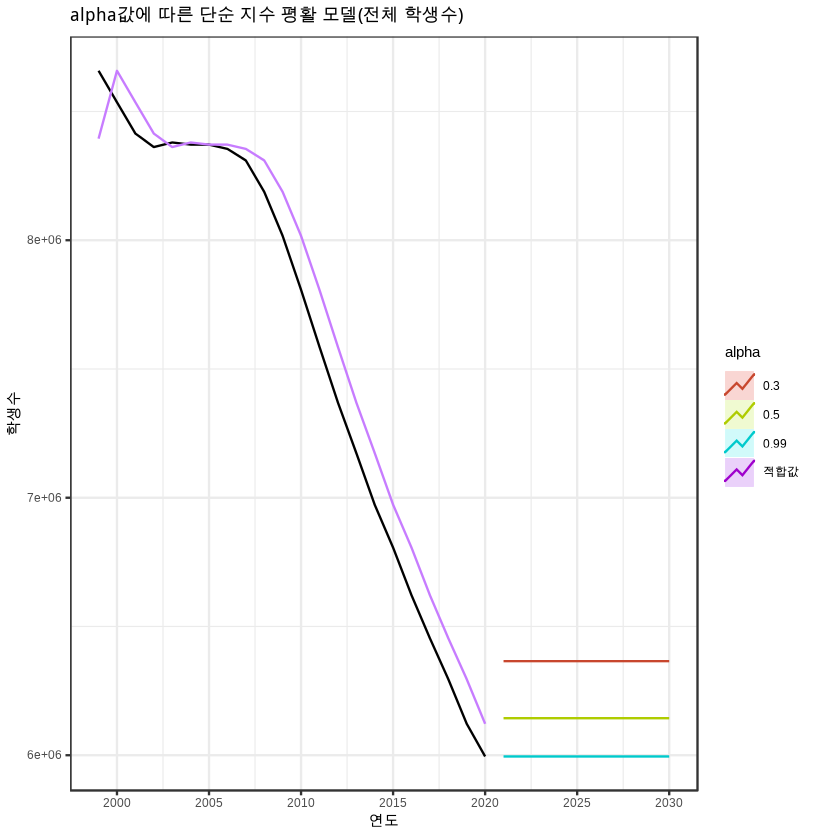

In [53]:
autoplot(students.ts[,2]) +
  autolayer(fitted(ses(students.ts[,2])), series = '적합값') +
  autolayer(ses(students.ts[,2]), PI = F, series = '0.99') +
  autolayer(ses(students.ts[,2], alpha = 0.5), PI = F, series = '0.5') +
  autolayer(ses(students.ts[,2], alpha = 0.3), PI = F, series = '0.3') +
  labs(title = 'alpha값에 따른 단순 지수 평활 모델(전체 학생수)', 
       x = '연도', y = '학생수', color = 'alpha')

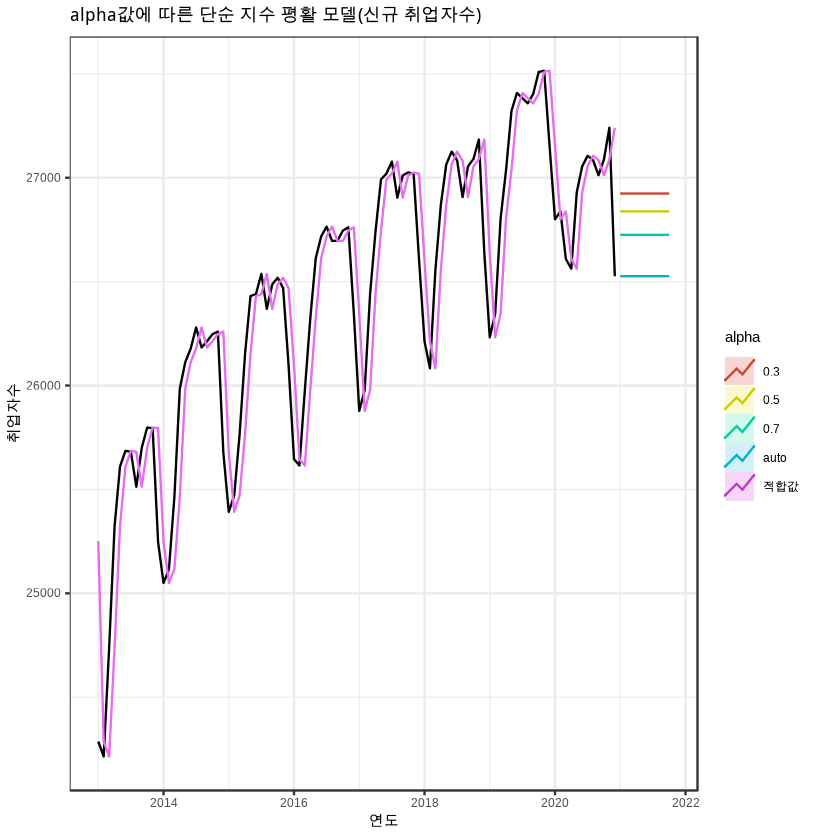

In [54]:
# 전체 취업자수에 대한 Simple Exponential Smoothing
autoplot(employees.ts[,2]) +
  autolayer(fitted(ses(employees.ts[,2])), series = '적합값') +
  autolayer(ses(employees.ts[,2]), series = 'auto', PI = F) +
  autolayer(ses(employees.ts[,2], alpha = 0.3), series = '0.3', PI = F) +
  autolayer(ses(employees.ts[,2], alpha = 0.5), series = '0.5', PI = F) +
  autolayer(ses(employees.ts[,2], alpha = 0.7), series = '0.7', PI = F) +
  labs(title = 'alpha값에 따른 단순 지수 평활 모델(신규 취업자수)', 
       x = '연도', y = '취업자수', color = 'alpha')

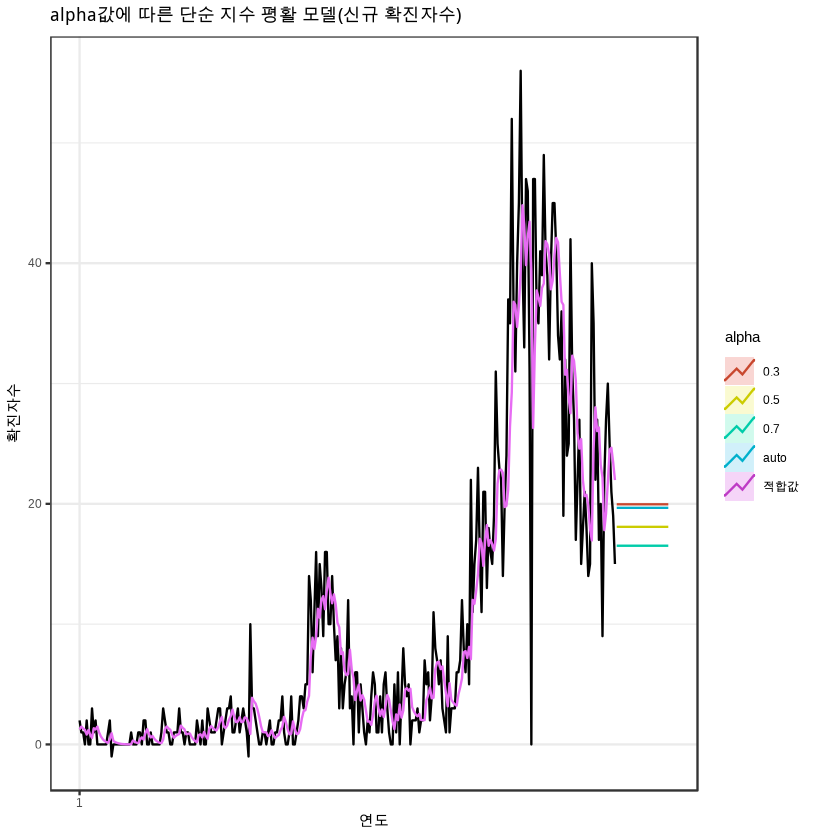

In [55]:
# 코로나 신규 확진자수(0-9세)에 대한 Simple Exponential Smoothing
autoplot(covid19.ts[,2]) +
  autolayer(fitted(ses(covid19.ts[,2])), series = '적합값') +
  autolayer(ses(covid19.ts[,2], h = 30), series = 'auto', PI = F) +
  autolayer(ses(covid19.ts[,2], alpha = 0.3, h = 30), series = '0.3', PI = F) +
  autolayer(ses(covid19.ts[,2], alpha = 0.5, h = 30), series = '0.5', PI = F) +
  autolayer(ses(covid19.ts[,2], alpha = 0.7, h = 30), series = '0.7', PI = F) +
  labs(title = 'alpha값에 따른 단순 지수 평활 모델(신규 확진자수)', 
       x = '연도', y = '확진자수', color = 'alpha')

### 평활 계수가 클수록 데이터 변화에 빠르게 반응하여 예측의 감응도가 증가
### 평활 계수가 작으면 데이터 변화에 느리게 반응하여 예측의 안정성이 증가

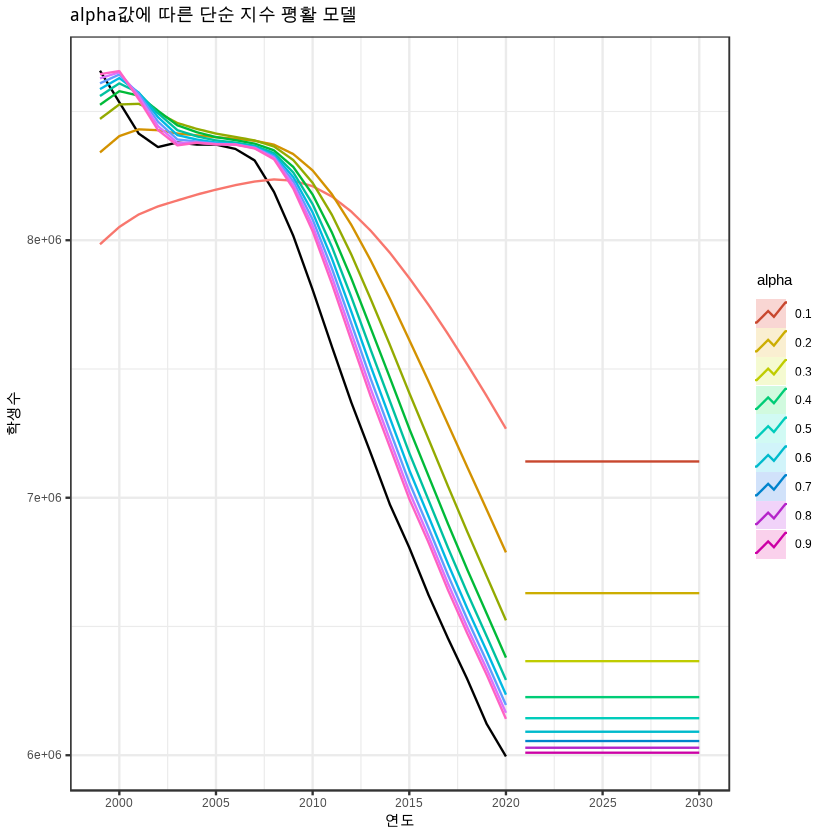

In [56]:
# 전체 학생수의 alpha 값에 따른 적합치와 예측값의 변화
autoplot(students.ts[,2], color = 'black') +
  autolayer(fitted(ses(students.ts[,2], alpha = 0.1)), series = '0.1') +
  autolayer(ses(students.ts[,2], alpha = 0.1, PI = FALSE), series = '0.1') +

  autolayer(fitted(ses(students.ts[,2], alpha = 0.2)), series = '0.2') +
  autolayer(ses(students.ts[,2], alpha = 0.2, PI = FALSE), series = '0.2') +

  autolayer(fitted(ses(students.ts[,2], alpha = 0.3)), series = '0.3') +
  autolayer(ses(students.ts[,2], alpha = 0.3, PI = FALSE), series = '0.3') +

  autolayer(fitted(ses(students.ts[,2], alpha = 0.4)), series = '0.4') +
  autolayer(ses(students.ts[,2], alpha = 0.4, PI = FALSE), series = '0.4') +

  autolayer(fitted(ses(students.ts[,2], alpha = 0.5)), series = '0.5') +
  autolayer(ses(students.ts[,2], alpha = 0.5, PI = FALSE), series = '0.5') +

  autolayer(fitted(ses(students.ts[,2], alpha = 0.6)), series = '0.6') +
  autolayer(ses(students.ts[,2], alpha = 0.6, PI = FALSE), series = '0.6') +

  autolayer(fitted(ses(students.ts[,2], alpha = 0.7)), series = '0.7') +
  autolayer(ses(students.ts[,2], alpha = 0.7, PI = FALSE), series = '0.7') +

  autolayer(fitted(ses(students.ts[,2], alpha = 0.8)), series = '0.8') +
  autolayer(ses(students.ts[,2], alpha = 0.8, PI = FALSE), series = '0.8') +

  autolayer(fitted(ses(students.ts[,2], alpha = 0.9)), series = '0.9') +
  autolayer(ses(students.ts[,2], alpha = 0.9, PI = FALSE), series = '0.9') +

  labs(title = 'alpha값에 따른 단순 지수 평활 모델', x = '연도', y = '학생수', color = 'alpha')

## 홀트 모델 (Holt) : 추세가 있는 데이터에 사용

### ```forecast::ses()```
- ```alpha``` : 평활 계수
- ```beta``` : 추세 기울기 값


### ```holt()``` : 홀트 모델 생성
- ```alpha``` : 평활 계수
- ```beta``` : 추세 기울기 값
- ```damped``` : 증가나 감소 추세를 지연 (TRUE / FALSE)

In [57]:
# 전체 학생수에 대한 홀트 모델링
summary(holt(students.ts[,2]))


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = students.ts[, 2]) 

  Smoothing parameters:
    alpha = 0.8654 
    beta  = 0.8654 

  Initial states:
    l = 8966192.6427 
    b = -36934.0002 

  sigma:  82114.94

     AIC     AICc      BIC 
571.4867 575.2367 576.9419 

Error measures:
                    ME     RMSE      MAE        MPE      MAPE     MASE
Training set -5106.807 74275.76 46971.89 -0.0472354 0.5836661 0.365499
                    ACF1
Training set -0.00685211

Forecasts:
     Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
2021        5855531 5750297 5960766 5694589 6016474
2022        5721369 5511013 5931725 5399658 6043081
2023        5587207 5242397 5932018 5059866 6114549
2024        5453045 4951452 5954638 4685925 6220166
2025        5318883 4641431 5996336 4282810 6354957
2026        5184721 4314366 6055077 3853627 6515816
2027        5050559 3971709 6129409 3400601 6700518
2028        4916397 3614582 6218212 2925443 6907352
2029

* **alpha = 0.8654**
* **beta = 0.8654**
* **I = 8966192.6427 : 예측 수준의 초기치**
* **b = -36934.0002 : 추세의 초기치**

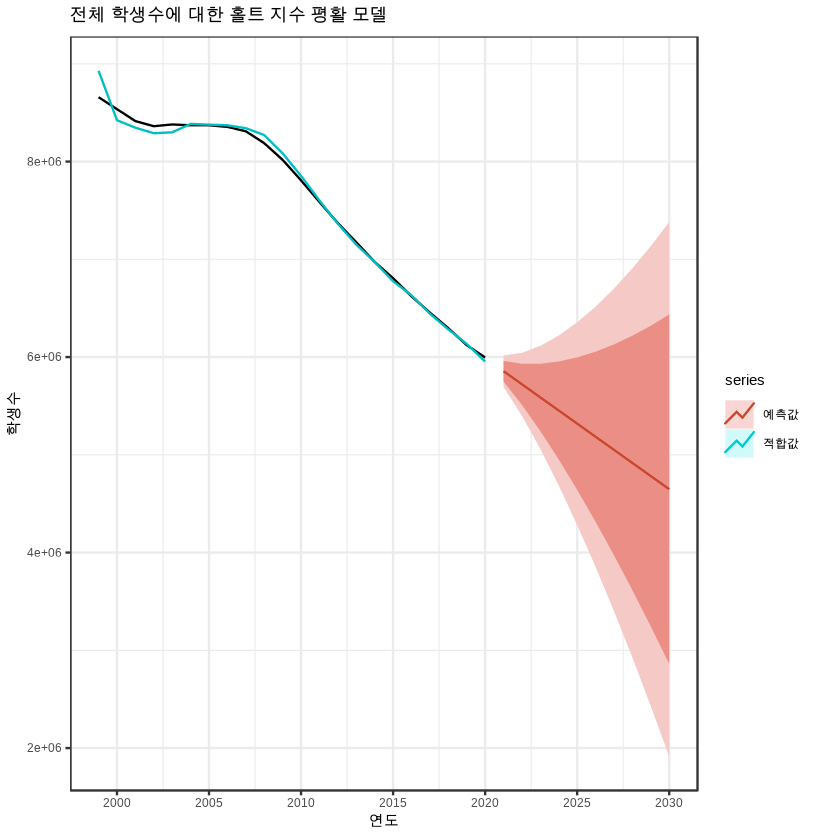

In [58]:
# 전체 학생수에 대한 홀트 모델링
autoplot(students.ts[,2]) +
  autolayer(fitted(holt(students.ts[,2])), series = '적합값') +
  autolayer(holt(students.ts[,2]), series = '예측값') +
  labs(title = '전체 학생수에 대한 홀트 지수 평활 모델', x = '연도', y = '학생수')

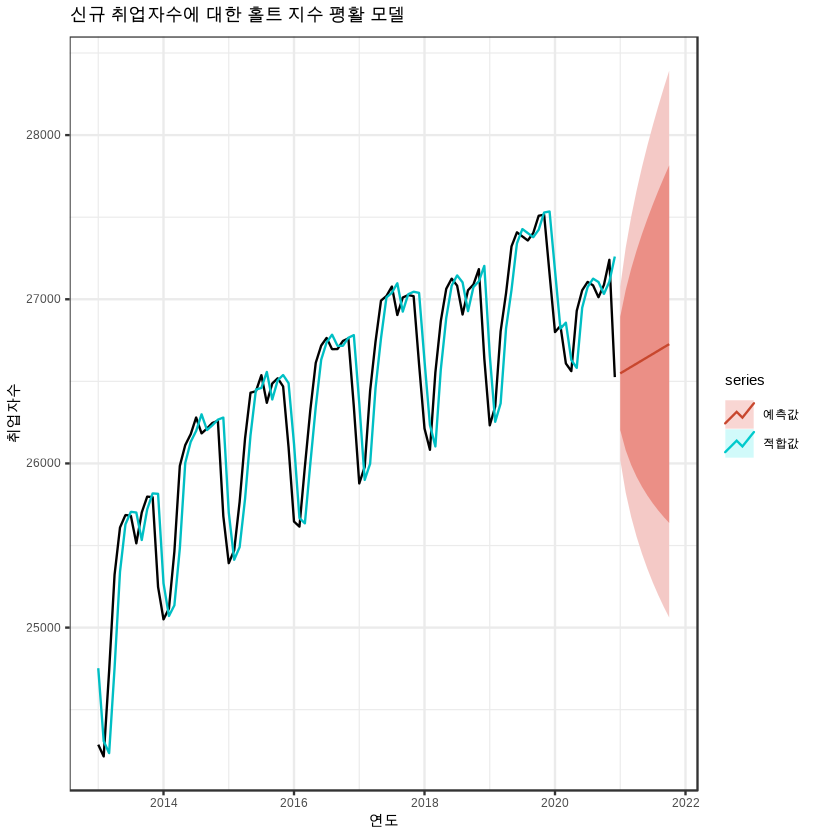

In [59]:
# 전체 취업자수에 대한 Holt modeling
autoplot(employees.ts[,2]) +
  autolayer(fitted(holt(employees.ts[,2])), series = '적합값') +
  autolayer(holt(employees.ts[,2]), series = '예측값') +
  labs(title = '신규 취업자수에 대한 홀트 지수 평활 모델', x = '연도', y = '취업자수')

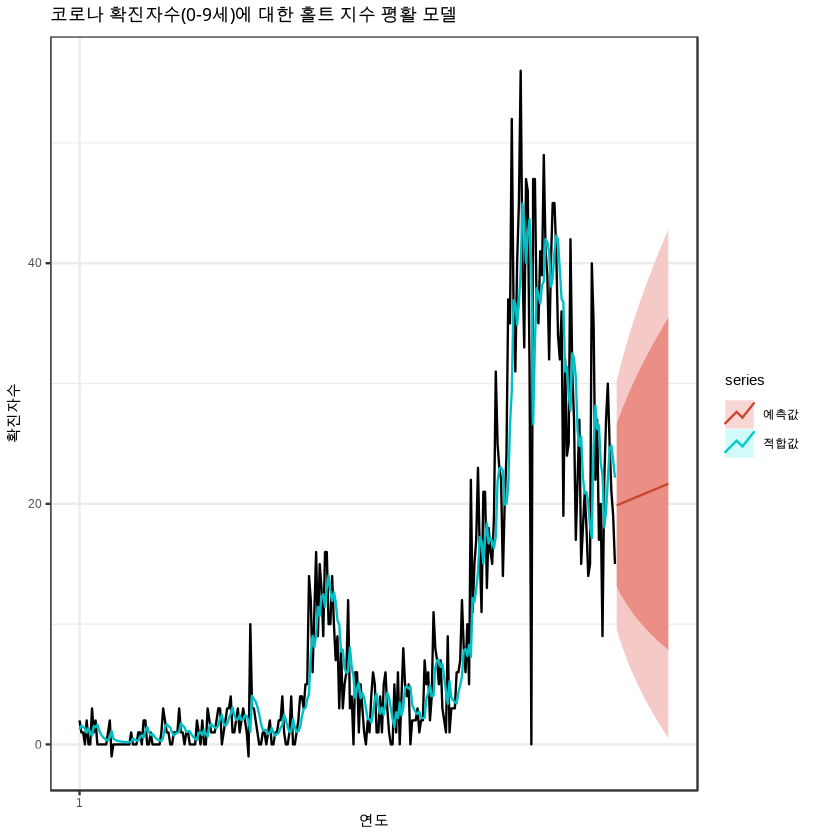

In [60]:
# 코로나 신규확진자수(0-9세)에 대한 홀트 모델링
autoplot(covid19.ts[,2]) +
  autolayer(fitted(holt(covid19.ts[,2])), series = '적합값') +
  autolayer(holt(covid19.ts[,2], h = 30), series = '예측값') +
  labs(title = '코로나 확진자수(0-9세)에 대한 홀트 지수 평활 모델', x = '연도', y = '확진자수')

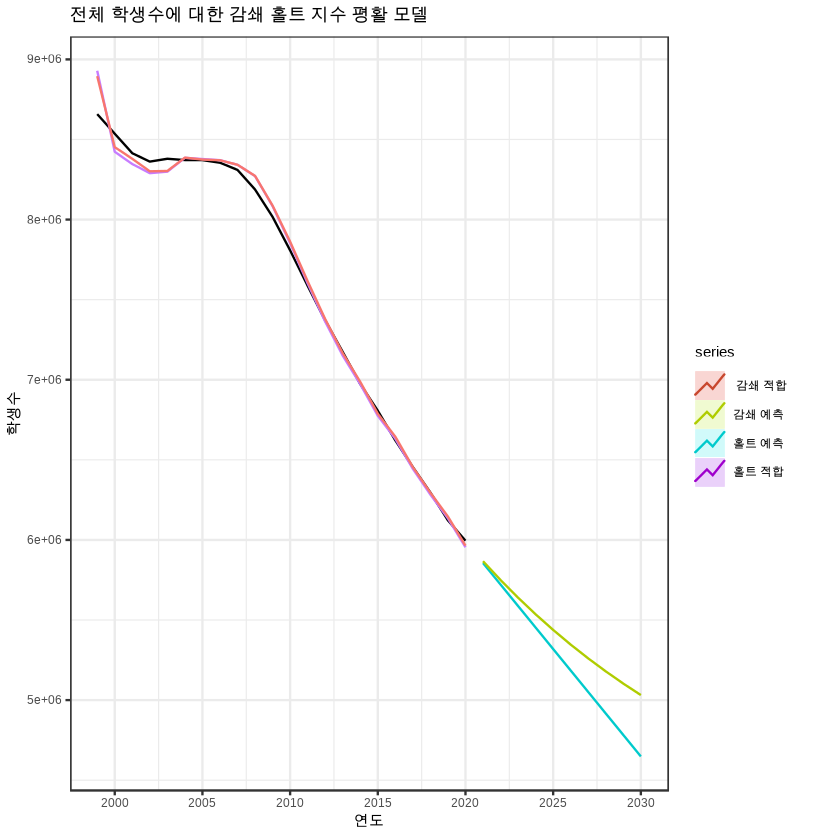

In [61]:
# 전체 학생수에 대한 홀트 모델링 비교
autoplot(students.ts[,2]) +
  autolayer(fitted(holt(students.ts[,2])), series = '홀트 적합') +
  autolayer(fitted(holt(students.ts[,2], damped = TRUE)), series = ' 감쇄 적합') +
  autolayer(holt(students.ts[,2]), series = '홀트 예측', PI = FALSE) +
  autolayer(holt(students.ts[,2], damped = TRUE), series = '감쇄 예측', PI = FALSE) +
  labs(title = '전체 학생수에 대한 감쇄 홀트 지수 평활 모델', x = '연도', y = '학생수')

### 홀트 모델은 미래 예측값에 일정한 증가, 감소가 나타남
### 추세가 증가 추세이면 예측값이 계속 증가, 감소 추세이면 계속 감소
### 특히 감소 추세일 때 계속 감소하면 어느 순간 음수값을 가질 수도 있음, 감소 추세가 있는 경우 어느 정도에서 감소추세를 지연시킬 필요가 있다.
### ```damped```를 통해 증가나 감소 추세를 지연

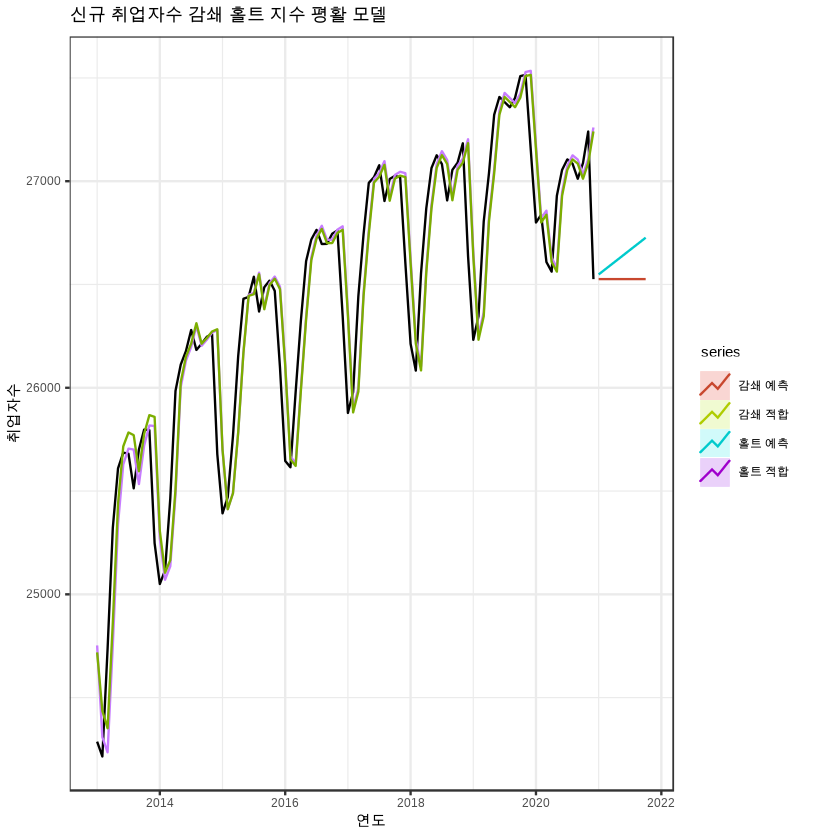

In [62]:
# 전체 취업자수에 대한 홀트 모델링 비교
autoplot(employees.ts[,2]) +
  autolayer(fitted(holt(employees.ts[,2])), series = '홀트 적합') +
  autolayer(fitted(holt(employees.ts[,2], damped = TRUE)), series = '감쇄 적합') +
  autolayer(holt(employees.ts[,2]), series = '홀트 예측', PI = FALSE) +
  autolayer(holt(employees.ts[,2], damped = TRUE), series = '감쇄 예측', PI = FALSE) +
  labs(title = '신규 취업자수 감쇄 홀트 지수 평활 모델', x = '연도', y = '취업자수')

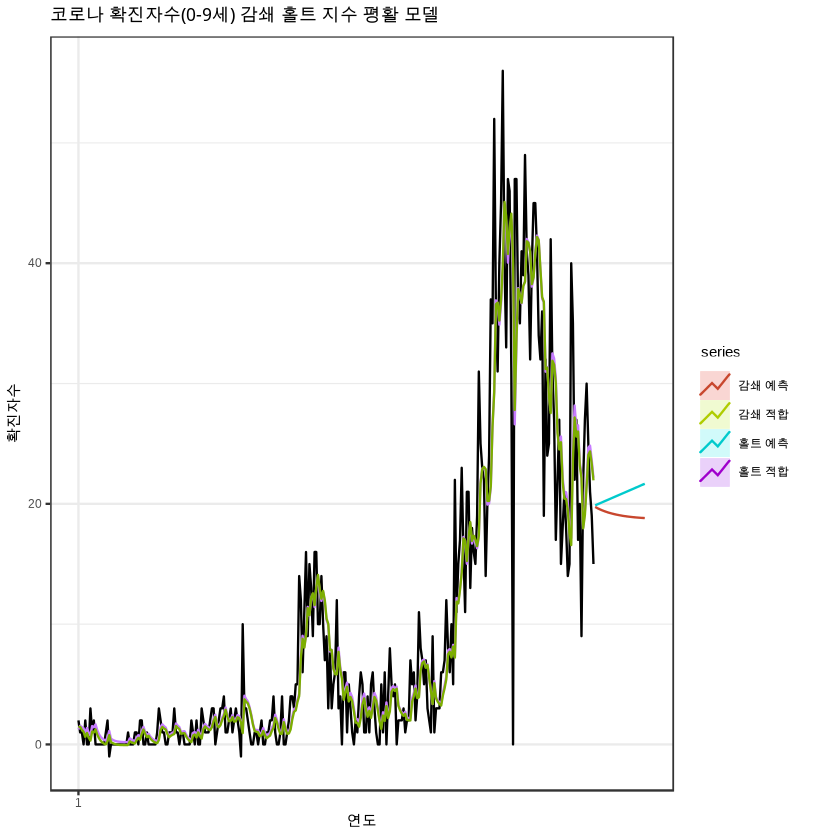

In [63]:
# 코로나 신규확진자수(0-9세)에 대한 홀트 모델링 비교
autoplot(covid19.ts[,2]) +
  autolayer(fitted(holt(covid19.ts[,2])), series = '홀트 적합') +
  autolayer(fitted(holt(covid19.ts[,2], damped = TRUE)), series = '감쇄 적합') +
  autolayer(holt(covid19.ts[,2], h = 30), series = '홀트 예측', PI = FALSE) +
  autolayer(holt(covid19.ts[,2], h = 30, damped = TRUE), series = '감쇄 예측', PI = FALSE) +
  labs(title = '코로나 확진자수(0-9세) 감쇄 홀트 지수 평활 모델', x = '연도', y = '확진자수')

### 사실상 추세 기울기 값은 결과값에 큰 차이를 나타내지 않음

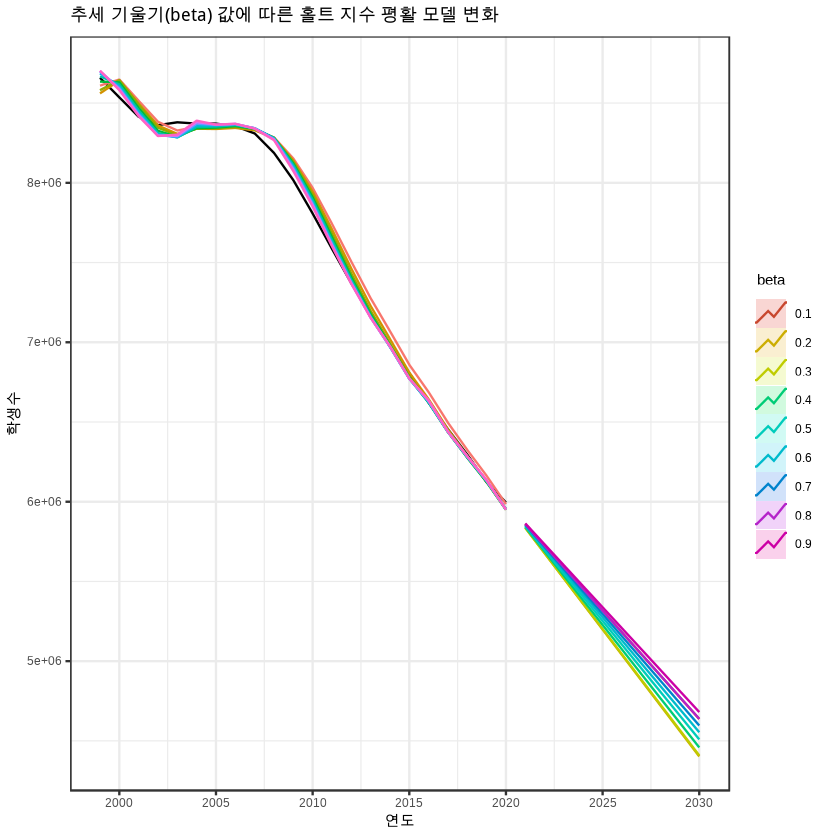

In [64]:
autoplot(students.ts[,2]) +
  autolayer(fitted(holt(students.ts[,2], beta = 0.1)), series = '0.1') +
  autolayer(holt(students.ts[,2], beta = 0.1, PI = F), series = '0.1') +
  autolayer(fitted(holt(students.ts[,2], beta = 0.2)), series = '0.2')+
  autolayer(holt(students.ts[,2], beta = 0.2, PI = F), series = '0.2') +
  autolayer(fitted(holt(students.ts[,2], beta = 0.3)), series = '0.3')+
  autolayer(holt(students.ts[,2], beta = 0.3, PI = F), series = '0.3') +
  autolayer(fitted(holt(students.ts[,2], beta = 0.4)), series = '0.4')+
  autolayer(holt(students.ts[,2], beta = 0.4, PI = F), series = '0.4') +
  autolayer(fitted(holt(students.ts[,2], beta = 0.5)), series = '0.5')+
  autolayer(holt(students.ts[,2], beta = 0.5, PI = F), series = '0.5') +
  autolayer(fitted(holt(students.ts[,2], beta = 0.6)), series = '0.6')+
  autolayer(holt(students.ts[,2], beta = 0.6, PI = F), series = '0.6') +
  autolayer(fitted(holt(students.ts[,2], beta = 0.7)), series = '0.7')+
  autolayer(holt(students.ts[,2], beta = 0.7, PI = F), series = '0.7') +
  autolayer(fitted(holt(students.ts[,2], beta = 0.8)), series = '0.8')+
  autolayer(holt(students.ts[,2], beta = 0.8, PI = F), series = '0.8') +
  autolayer(fitted(holt(students.ts[,2], beta = 0.9)), series = '0.9')+
  autolayer(holt(students.ts[,2], beta = 0.9, PI = F), series = '0.9') +
  labs(title = '추세 기울기(beta) 값에 따른 홀트 지수 평활 모델 변화', 
       x = '연도', y = '학생수', color = 'beta')

## 홀트 윈터 모델 : 추세와 계절성이 있는 데이터에 사용

1. 덧셈 방법 : 계절성의 진폭이 비교적 일정

2. 곱셈 방법 : 계절성의 진폭이 추세에 비례하여 변동성이 있을 때 사용, 먼 미래일수록 예측값이 커지게 됨

### ```forecast::hw()```
- ```alpha``` : 평활 계수
- ```beta``` : 추세 기울기 값
- ```gamma``` : 계절 변수
- ```seasonal``` : "additive" : 덧셈 방법 / "multiplicative" : 곱셈 방법

### 덧셈 방법과 곱셈 방법 중 어느 방법을 선택해야 하는지는 시각적으로 확인 필요

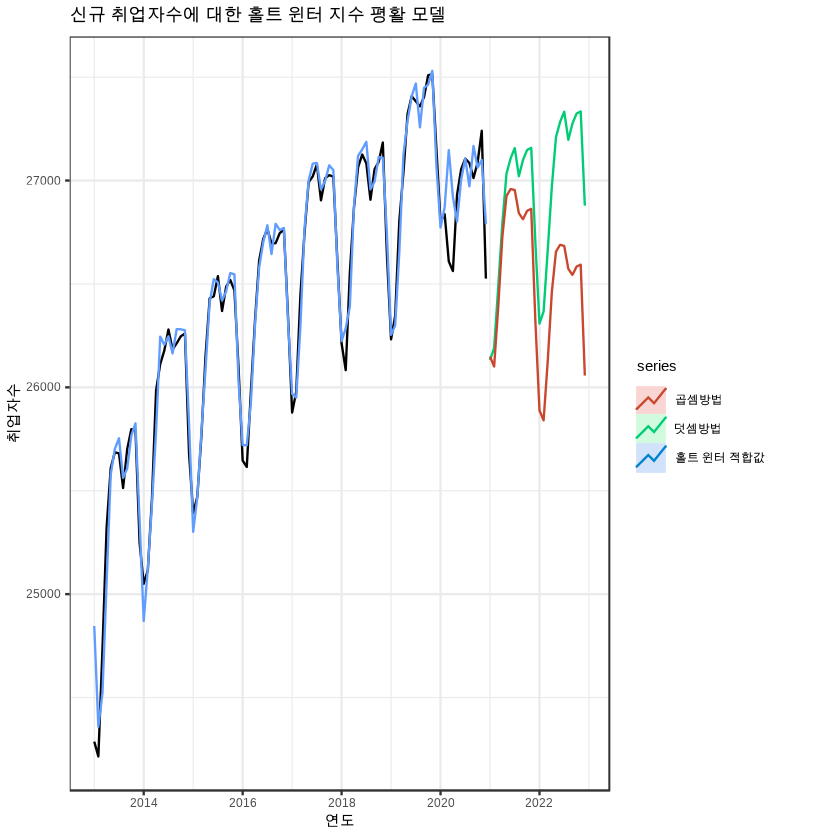

In [65]:
autoplot(employees.ts[,2]) +
  autolayer(fitted(hw(employees.ts[,2])), series = '홀트 윈터 적합값') +
  autolayer(hw(employees.ts[,2], seasonal = 'additive'), PI = FALSE, series = '덧셈방법') +
  autolayer(hw(employees.ts[,2], seasonal = 'multiplicative'), PI = FALSE, series = '곱셈방법') +
  labs(title = '신규 취업자수에 대한 홀트 윈터 지수 평활 모델', x = '연도', y = '취업자수')

## ETS 모델 : Error, Trend, Season, 지수 평활 모델을 잔차로 보정한 모델


### 상태공간 : 각 모델은 데이터의 측정식과, 측정식에서 추출된 추세, 계절성 등을 통해 추정되는 미래 예측값에 대한 상태식에 따라 결정, 이를 상태공간이라고 함

### 오류 보정 방법 : 덧셈 보정 (A)

| | 덧셈 추세 (A) | 감쇠 덧셈 추세 (Ad) | 추세 없음 (N) |
| -- | -- | -- | -- |
| 덧셈 계절성 (A) | (A, A, A) = 덧셈 홀트 윈터 | (A, Ad, A) | (A, N, A)
| 곱셈 계절성 (M) | (A, A, M) = 곱셈 홀트 윈터 | (A, Ad, M) = 감쇠 홀트 윈터 | (A, N, M) |
| 계절성 없음 (N) | (A, A, N) = 홀트 윈터 | (A, Ad, N) = 감쇠 추세 | (A, N, N) = 단순 평활 |


### 오류 보정 방법 : 곱셈 보정 (M)

| | 덧셈 추세 (A) | 감쇠 덧셈 추세 (Ad) | 추세 없음 (N) |
| -- | -- | -- | -- |
| 덧셈 계절성 (A) | (M, A, A) = 덧셈 홀트 윈터 | (M, Ad, A) | (M, N, A)
| 곱셈 계절성 (M) | (M, A, M) = 곱셈 홀트 윈터 | (M, Ad, M) = 감쇠 홀트 윈터 | (M, N, M) |
| 계절성 없음 (N) | (M, A, N) = 홀트 윈터 | (M, Ad, N) = 감쇠 추세 | (M, N, N) = 단순 평활 |


### ```forecast::ets()```

ETS(A,Ad,N) 

Call:
 ets(y = students.ts[, 2]) 

  Smoothing parameters:
    alpha = 0.8929 
    beta  = 0.8929 
    phi   = 0.9401 

  Initial states:
    l = 8930071.6714 
    b = -36934.5936 

  sigma:  74403.08

     AIC     AICc      BIC 
567.8898 573.4898 574.4361 

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE     MASE
Training set -13547.67 65403.96 42008.54 -0.1655554 0.523083 0.326878
                    ACF1
Training set 0.007506032

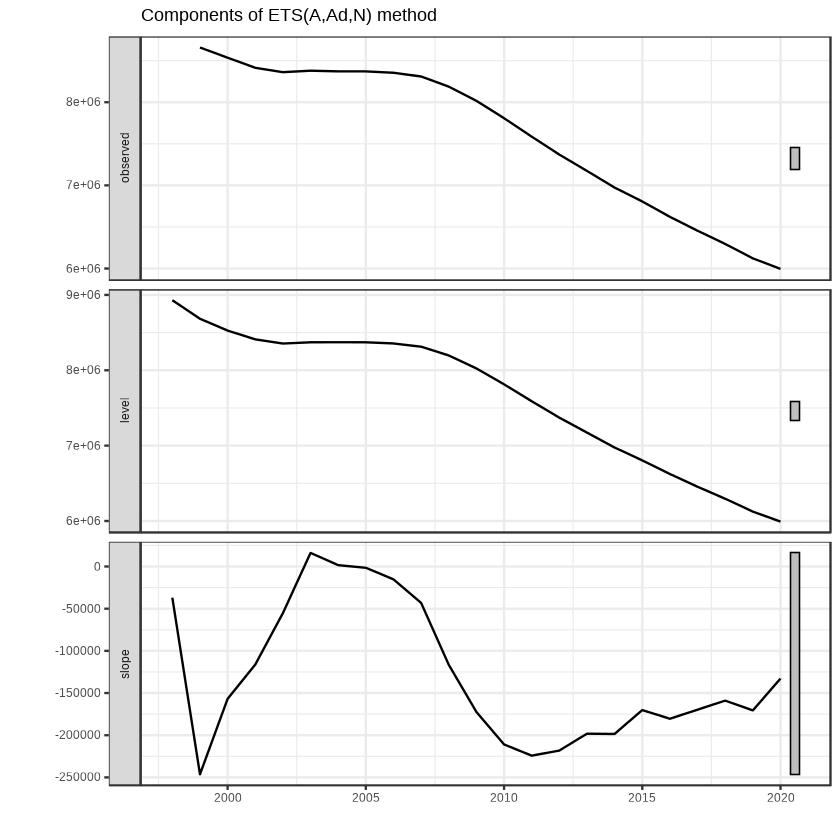

In [77]:
# 총학생수에 대한 ets 모델
ets(students.ts[,2]) %>% summary

# 전체 학생수에 대한 ets 모델 ploting
ets(students.ts[,2]) %>% autoplot()

### ETS(A, Ad, N) : 덧센 보정, 감쇠 추세, 계절성 없음 모델 (덧셈 보정 감쇠 추세)
### 레벨 평활 계수 = 0.8929, 추세 평활 계수 = 0.8929, 감쇠 평활 계수 = 0.9401

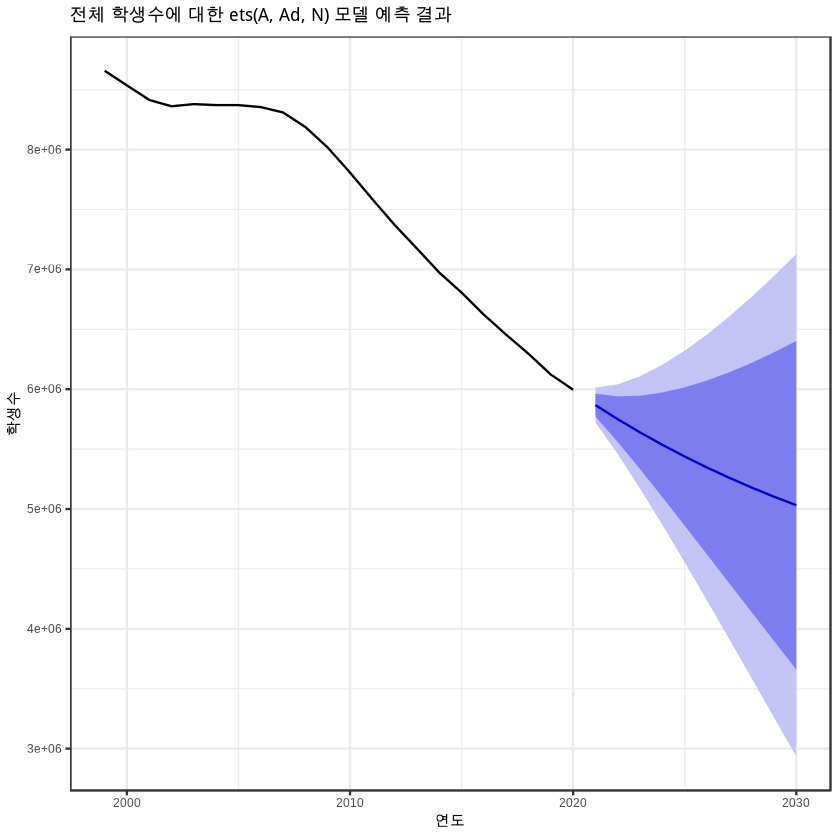

In [78]:
# 전체 학생수에 대한 예측값 ploting
ets(students.ts[,2]) %>% forecast() %>%
  autoplot() +
  labs(title = '전체 학생수에 대한 ets(A, Ad, N) 모델 예측 결과', x = '연도', y = '학생수')

ETS(M,Ad,A) 

Call:
 ets(y = employees.ts[, 2]) 

  Smoothing parameters:
    alpha = 0.9989 
    beta  = 1e-04 
    gamma = 2e-04 
    phi   = 0.9744 

  Initial states:
    l = 25055.6086 
    b = 53.1073 
    s = -222.3076 255.8486 261.7129 227.3178 163.5351 319.1916
           274.8844 226.215 -5.605 -294.4144 -588.041 -618.3374

  sigma:  0.0045

     AIC     AICc      BIC 
1372.968 1381.851 1419.126 

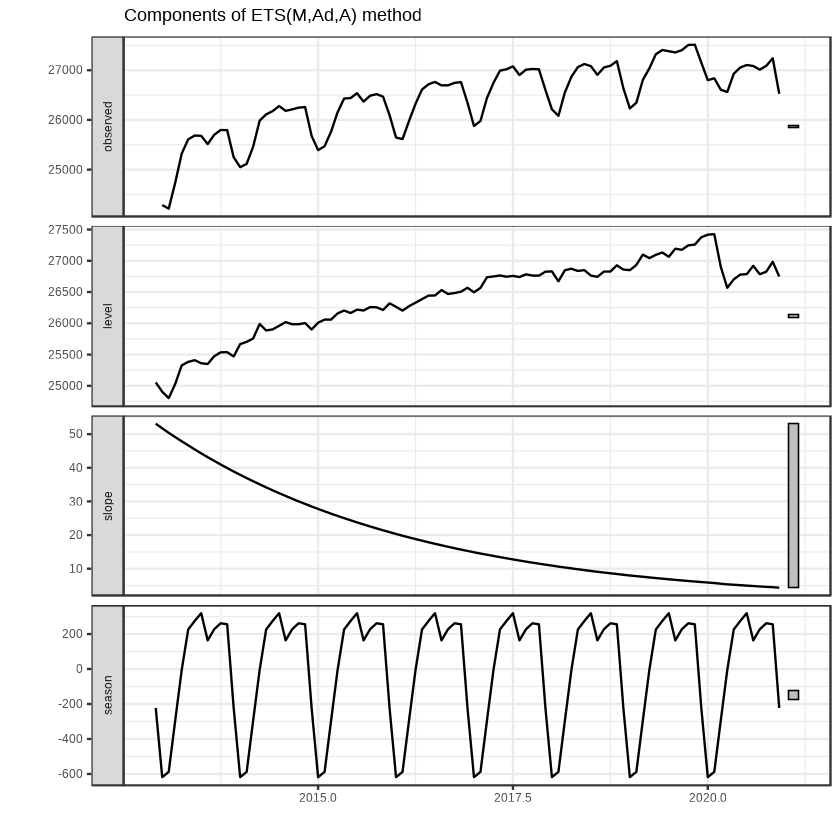

In [80]:
# ETS(M,Ad,A)로 모델 선정
ets(employees.ts[,2])

ets(employees.ts[,2]) %>% autoplot()

### ETS(M, Ad, A) : 곱셈 보정, 감쇠 덧셈 추세, 덧셈 계절성 모델
### 레벨 평활 계수 = 0.09989, 추세 평활 계수 = 0.0001, 계절 평활 계수 = 0.0002, 감쇠 평활 계수 = 0.9744

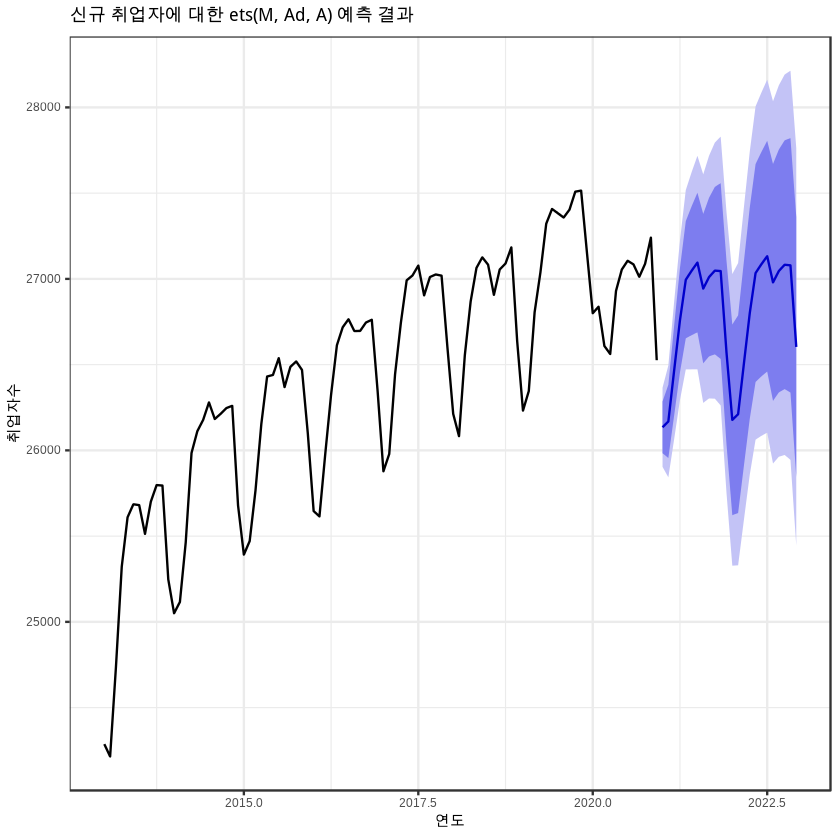

In [81]:
ets(employees.ts[,2]) %>% forecast() %>%
  autoplot() +
  labs(title = '신규 취업자에 대한 ets(M, Ad, A) 예측 결과', x = '연도', y = '취업자수')